# Parte 1. Exploración y procesamiento de datos

## Integrantes

   * Cristina Betancur
   * Melani Caucota
   * Virginia Chirilá

## Dataset elegido

Encuesta Anual de Hogares del año 2019 de la Ciudad Autónoma de Buenos Aires (CABA) realizado por la Dirección General de Estadísticas y Censos.

### Fuente
https://data.buenosaires.gob.ar/dataset/encuesta-anual-hogares/resource/3a45c563-396d-42de-ba93-8a93729e0723

## Objetivo

Con este trabajo planemos generar conocimiento para mejorar la toma de decisiones con respecto a la población de la Ciudad Autónoma de Buenos Aires (CABA). Para esto, desde la perspectiva de un tomador de decisiones, generamos preguntas de interés social, sanitario, económico y demográfico, las cuales trataremos de resolver valiéndonos de datos generados por la encuesta anual de hogares de CABA y tomando como unidad de estudio a las personas. En particular, buscamos estudiar los ingresos económicos de las personas y el uso del sistema de salud público.
   * Con respecto al uso del sistema de salud público, planteamos estudiar la probabilidad de que una persona se atienda en sistema de salud privado o público en base a características demográficas como la edad y el sexo, ocupacionales como si vive o no en barrios vulnerables; laborales como el estado ocupacional actual; educativas como el nivel máximo educativo o los años de escolaridad y de natalidad como la cantidad de hijos. 
   * Con respecto al ingreso económico planteamos estudiar cómo variables demográficas y socio-económicas como las descriptas arriba para el estudio del uso del sistema de salud pueden influir en el nivel de ingreso de una persona. .


## Librerías

In [76]:
#Importando librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import pearsonr
from pandas.plotting import scatter_matrix
import math
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn import preprocessing

## Data set

In [77]:
# Importo archivo csv
datos = pd.read_csv("encuesta-anual-hogares-2019.csv", delimiter=',')

In [78]:
# Inspecciono las 5 primeras filas
datos.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


### Dimensiones data set

In [79]:
# Utilizamos el método .shape para obtener las dimensiones del data frame: cantidad de filas y columnas
datos.shape

(14319, 31)

## Variables

El data frame brinda información sobre la situación socioeconómica de la población de la Ciudad de Buenos Aires, sus hogares y sus viviendas. Contiene variables relacionadas a vivienda y hábitat, hogares (tamaño y composición de los hogares), características demográficas básicas de la población (composición y estructura, situación conyugal, migración), trabajo y empleo (situación de la población en el mercado de trabajo, características ocupacionales), ingresos (laborales y no laborales), educación (asistencia al sistema de educación formal, nivel educativo de la población), salud (tipo de cobertura, consultas al
médico, estado general de salud) y fecundidad.

### Nombre de las variables

In [80]:
#Obtengo nombre de las columnas
datos.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

### Descripción de variables

1. **id:** Clave que identifica a la vivienda  
2. **nhogar:** La variable id + nhogar componen la clave que identifica a cada hogar  
3. **miembro:** Variables id + nhogar+ miembro componen la clave que identifica a cada persona  
4. **comuna:** Comuna donde reside la persona encuestada. _Variable categórica nominal con 15 niveles: números de comuna del uno al 15._
5. **dominio:** Variable categórica que indica si la vivienda se ubica en una villa de emergencia. _Variable categórica nominal con dos niveles: 'Resto de la Ciudad' y 'Villas de emergencia'_
6. **edad:**	Edad de la persona encuestada. _Variable cuantitativa discreta._
7. **sexo:**	Sexo de la persona encuestada. _Variable categórica binaria con dos niveles: 'Mujer' y 'Varon'._
8. **parentesco_jefe:** Variable categórica que indica la relación de parentesco entre la persona encuestada y el jefe/a de hogar. _Variable categórica nominal con 9 niveles: 'Jefe', 'Otro no familiar', 'Padre/Madre/Suegro/a','Otro familiar', 'Conyugue o pareja', 'Hijo/a - Hijastro/a', Nieto/a', 'Yerno/nuera' y 'Servicio domestico y sus familiares'._  
9. **situacion_conyugal:** Situación conyugal de la persona encuestada. _Variable categórica nominal con 7 niveles: 'Soltero/a', 'Viudo/a', 'Unido/a', 'No corresponde', 'Separado/a de unión o matrimonio', 'Divorciado/a' y 'Casado/a'._  
10. **num_miembro_padre:**	Número de miembro del hogar (variable miembro) que corresponde al padre del individuo.
11. **num_miembro_madre:**	Número de miembro del hogar (variable miembro) que corresponde a la madre del individuo. 
12. **estado_ocupacional:** Situación ocupacional de la persona encuestada. _Variable categórica nominal con 3 niveles: 'Inactivo', 'Ocupado' y 'Desocupado'._
13. **cat_ocupacional:** Categoría ocupacional de la persona encuestada. _Variable categórica nominal con 5 niveles: 'No corresponde', 'Asalariado', 'Trabajador por cuenta propia', 'Patron/empleador' y 'Trabajador familiar'._
14. **calidad_ingresos_lab:** Calidad de la declaración de ingresos laborales totales. _Variable categórica nominal con 4 niveles: 'No tuvo ingresos', 'Tuvo ingresos y declara monto','No corresponde'y 'Tuvo ingresos pero no declara monto'_
15. **ingreso_total_lab:**	Monto del ingreso total laboral percibido el mes anterior. _Variable cuantitativa continua._
16. **calidad_ingresos_no_lab:** Calidad de la declaración de ingresos no laborales totales. _Variable categórica nominal con 4 niveles: 'Tuvo ingresos y declara monto', 'No tuvo ingresos', 'Tuvo ingresos pero no declara monto' y 'No corresponde'._
17. **ingreso_total_no_lab:**	Monto del ingreso total no laboral percibido el mes anterior. _Variable cuantitativa continua._
18. **calidad_ingresos_totales:**	Calidad de ingresos totales individuales. _Variable categórica nominal con 4 niveles: 'Tuvo ingresos y declara monto', 'No tuvo ingresos','Tuvo ingresos pero no declara monto' y'No corresponde'._ 
19. **ingresos_totales:** Monto del ingreso total individual percibido el mes anterior. _Variable cuantitativa continua._
20. **calidad_ingresos_familiares:**	Calidad de ingresos totales familiares. _Variable categórica nominal con 3 niveles: 'Tuvo ingresos y declara monto','Tuvo ingresos pero no declara monto' y 'No tuvo ingresos'._
21. **ingresos_familiares:** Monto de ingresos totales familiares percibido el mes anterior. _Variable cuantitativa continua._
22. **ingreso_per_capita_familiar:** Monto de ingresos totales familiares percibido el mes anterior. _Variable cuantitativa continua._
23. **estado_educativo:** Asistencia (pasada o presente) o no a algún establecimiento educativo. _Variable categórica nominal con tres niveles: 'Nunca asistio', 'No asiste pero asistió' y 'Asiste'._ 
24. **sector_educativo:** Sector al que pertenece el establecimiento educativo al que asiste. _Variable categórica nominal con 4 niveles: 'Estatal/publico', 'Privado religioso', 'No corresponde' y 'Privado no religioso'._
25. **nivel_actual:** Nivel cursado al momento de la encuesta. _Variable categórica nominal con 14 niveles: 'Universitario', 'No corresponde', 'Secundario/medio comun', 'Terciario/superior no universitario', 'Jardin maternal','Secundario/medio adultos', 'Sala de 4', 'Primario comun', 'Sala de 5', 'Postgrado', 'Sala de 3', 'Primario adultos','Primario especial' y 'Otras escuelas especiales'._
26. **nivel_max_educativo:** Máximo nivel educativo que se cursó. _Variable categórica nominal con 7 niveles: 'Otras escuelas especiales', 'Secundario/medio comun','EGB (1° a 9° año)', 'Primario especial', 'Primario comun', 'Sala de 5' y 'No corresponde'._
27. **años_escolaridad:** Años de escolaridad alcanzados. _Variable cuantitativa discreta._
28. **lugar_nacimiento:** Lugar de nacimiento de la persona encuestada. _Variable categórica nominal con 7 niveles: 'PBA excepto GBA', 'Otra provincia', 'CABA', 'Partido GBA', 'Pais no limitrofe', 'Pais limitrofe' y 'PBA sin especificar'._
29. **afiliacion_salud:** Afiliación de salud de la persona encuestada. _Variable categórica nominal con 5 niveles: 'Solo obra social', 'Solo plan de medicina prepaga por contratación voluntaria', 'Solo prepaga o mutual via OS', 'Solo sistema publico' y 'Otros'._
30. **hijos_nacidos_vivos:** Tiene o tuvo hijos nacidos vivos. _Variable categórica binaria. Dos niveles: 'Si' y 'No'._
31. **cantidad_hijos_nac_vivos:** Cantidad de hijos nacidos vivos. _Variable cuantitativa discreta._

### Tipo de datos de cada columna

In [81]:
# Exploramos los tipos de datos de cada columna
datos.dtypes

id                              int64
nhogar                          int64
miembro                         int64
comuna                          int64
dominio                        object
edad                            int64
sexo                           object
parentesco_jefe                object
situacion_conyugal             object
num_miembro_padre              object
num_miembro_madre              object
estado_ocupacional             object
cat_ocupacional                object
calidad_ingresos_lab           object
ingreso_total_lab               int64
calidad_ingresos_no_lab        object
ingreso_total_no_lab            int64
calidad_ingresos_totales       object
ingresos_totales                int64
calidad_ingresos_familiares    object
ingresos_familiares             int64
ingreso_per_capita_familiar     int64
estado_educativo               object
sector_educativo               object
nivel_actual                   object
nivel_max_educativo            object
años_escolar

## Análisis exploratorio y procesamiento de los datos

El data frame contiene 31 columnas de las cuales 5 corresponden a índices (id, nhogar, miembro,num_miembro_padre y num_miembro_madre), 18 son categóricas y 8 son cuantitativas. 

   


### Cantidad de valores nulos

In [82]:
# Obtengo cantidad de nulos por variable
datos.isnull().sum()

id                                0
nhogar                            0
miembro                           0
comuna                            0
dominio                           0
edad                              0
sexo                              0
parentesco_jefe                   0
situacion_conyugal                1
num_miembro_padre                 0
num_miembro_madre                 0
estado_ocupacional                0
cat_ocupacional                   0
calidad_ingresos_lab              0
ingreso_total_lab                 0
calidad_ingresos_no_lab           0
ingreso_total_no_lab              0
calidad_ingresos_totales          0
ingresos_totales                  0
calidad_ingresos_familiares       0
ingresos_familiares               0
ingreso_per_capita_familiar       0
estado_educativo                  0
sector_educativo                  3
nivel_actual                      0
nivel_max_educativo            1054
años_escolaridad                 62
lugar_nacimiento            

### Exploración de valores nulos presentes


#### Tratamiento variable Hijos_nacidos_vivos

La variable **hijos_nacidos_vivos** contiene la mayor cantidad de valores nulos del data frame, 54% de los registros de la variable son nulos (7784/len(datos)). La información contenida en esta variable es similar a la de la variable **cantidad_hijos_nac_vivos**. Se podría considerar:
   * eliminar la variable **hijos_nacidos_vivos** y utilizar **cantidad_hijos_nac_vivos** , que no posee nulos, en los análisis si es necesario.
   * Imputar los nulos por una categoría ya existente basandonos en la información que nos aporta otras columnas del data frame como edad o cantidad_hijos_nacidos_vivos

Decidimos transformar la variable hijos_nacidos_vivos

Evidencia de que la categoría "No corresponde" de la columna cantidad_hijos_nac_vivos contiene la misma información a los nulos de la de la columna hijos_nacidos_vivos: 

In [83]:
#Relacion entre los nulos y los no de la variable hijos_nacidos_vivos y los valores no corresponde de la variable cantidad_hijos_nacidos_vivos
cant_sinHijos_nulos = len(datos[(datos['hijos_nacidos_vivos'].isnull())])
cant_sinHijos_noCorresponde = len(datos[(datos['hijos_nacidos_vivos'] == 'No')])
cant_hijosNacidos_noCorresponde = len(datos[(datos['cantidad_hijos_nac_vivos'] == 'No corresponde')])
print(f'Cantidad de encuestados sin hijos cuyo valor es nulo en la columna hijos_nacidos_vivos {cant_sinHijos_nulos}')
print(f'Cantidad de encuestados sin hijos cuyo valor es No en la columna hijos_nacidos_vivos {cant_sinHijos_noCorresponde}')
print(f'sumatoria total de las personas sin hijos de la columna hijos_nacidos_vivos {cant_sinHijos_noCorresponde+cant_sinHijos_nulos}')
print(f'Cantidad de valores No Corresponde en la columna Cantidad_hijos_nac_vivos {cant_hijosNacidos_noCorresponde}')

Cantidad de encuestados sin hijos cuyo valor es nulo en la columna hijos_nacidos_vivos 7784
Cantidad de encuestados sin hijos cuyo valor es No en la columna hijos_nacidos_vivos 2502
sumatoria total de las personas sin hijos de la columna hijos_nacidos_vivos 10286
Cantidad de valores No Corresponde en la columna Cantidad_hijos_nac_vivos 10286


In [84]:
datos.groupby('hijos_nacidos_vivos')['cantidad_hijos_nac_vivos'].value_counts()

hijos_nacidos_vivos  cantidad_hijos_nac_vivos
No                   No corresponde              2502
Si                   2                           1633
                     1                           1168
                     3                            765
                     4                            269
                     5                             94
                     6                             48
                     7                             31
                     8                              8
                     9                              6
                     11                             5
                     10                             3
                     12                             2
                     15                             1
Name: count, dtype: int64

Analizamos si la cantidad de valores nulos en la variable hijos_nacidos_vivos es igual a la cantidad de registros por edad 

In [85]:
# Obtengo la cantidad de valores nulos de la variable hijos_nacidos_vivos por edad y la exploro para los primeros años
count_nulls = datos.groupby('edad')['hijos_nacidos_vivos'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos por edad
nulls = count_nulls.reset_index()
nulls = nulls.rename(columns={'hijos_nacidos_vivos': 'nulls_hijos_nacidos_vivos'})
nulls.head(30)

,edad,nulls_hijos_nacidos_vivos
0,0,128
1,1,148
2,2,158
3,3,160
4,4,177
5,5,182
6,6,152
7,7,176
8,8,176
9,9,193


In [86]:
naedades = datos['edad'].value_counts()
naedades= naedades.to_frame()

In [87]:
naedades = naedades.reset_index()

In [88]:
naedades=naedades.sort_values(by='edad')
naedades.head(20)

,edad,count
71,0,128
61,1,148
50,2,158
49,3,160
35,4,177
31,5,182
55,6,152
37,7,176
36,8,176
24,9,193


La cantidad de nulos para la variable hijos_nacidos_vivos es igual a la cantidad de registros para la variable edad, al menos para gran parte de los menores de edad. Entonces, los nulos parecen corresponder a personas que no tuvieron hijos. Por lo tanto decidimos cambiar los valores nulos de la columna hijos_nacidos_vivos por No

In [89]:
datos.loc[(datos['hijos_nacidos_vivos'].isnull()),'hijos_nacidos_vivos'] = "No"
#Comprobamos 
datos.groupby('hijos_nacidos_vivos')['cantidad_hijos_nac_vivos'].value_counts()

hijos_nacidos_vivos  cantidad_hijos_nac_vivos
No                   No corresponde              10286
Si                   2                            1633
                     1                            1168
                     3                             765
                     4                             269
                     5                              94
                     6                              48
                     7                              31
                     8                               8
                     9                               6
                     11                              5
                     10                              3
                     12                              2
                     15                              1
Name: count, dtype: int64

#### Tratamiento variable nivel_max_educativo

Analizamos a distribución de nulos por edad a fin de ver si corresponden a registros de menores de edad que todavía no completaron ningún nivel escolar

In [90]:
# Obtengo la cantidad de valores nulos de la variable nivel_max_educativo por edad y la exploro para los primeros años
count_nulls = datos.groupby('edad')['nivel_max_educativo'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos por edad
nulls = count_nulls.to_frame() #Convertir serie en data frame
nulls = nulls.reset_index()
nulls = nulls.rename(columns={'nivel_max_educativo': 'nulls_nivel_max_educativo'})
print(nulls.head(10))

   edad  nulls_nivel_max_educativo
0     0                        128
1     1                        148
2     2                        158
3     3                        160
4     4                        177
5     5                        182
6     6                         53
7     7                          1
8     8                          0
9     9                          0


In [91]:
# Obtengo la cantidad de registros de la variable nivel_max_educativo por edad y la exploro para los primeros años
edades =[0,1,2,3,4,5,6,7,8]
for i in edades:
    numero = (datos['edad'] == i).sum()
    print(i, numero)
    
# Hasta los 5 años los valores nulos coindicen con el numero de personas registradas en ese rango de edades

0 128
1 148
2 158
3 160
4 177
5 182
6 152
7 176
8 176


Text(0.5, 0, 'Edad')

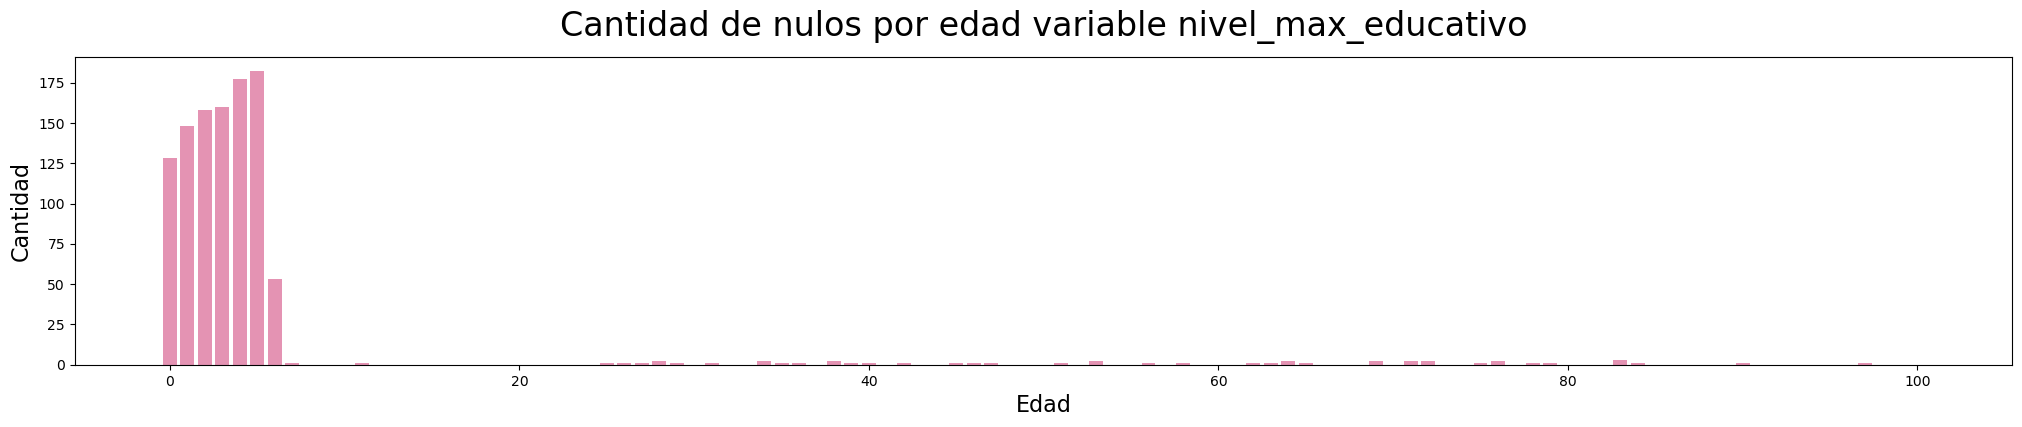

In [92]:
#Gráfico de cantidad de valores nulos por edad
plt.figure(figsize=(25, 4))
plt.bar("edad", "nulls_nivel_max_educativo", data=nulls, color="#E493B3")
plt.title('Cantidad de nulos por edad variable nivel_max_educativo', size=24, pad=15)
plt.ylabel('Cantidad', size=16)
plt.xlabel('Edad', size=16)

En la variable **nivel_max_educativo** los valores nulos estan concentrados en los primeros años de edad. Desde los 0 a los 5 años el número de personas registradas coincide con el número de nulos para cada una de esas edades. Sin embargo también podemos encontrar nulos en personas mayores de edad, casi en la totalidad de rangos de edad. Se podría considerar
  * Ubicar a los datos para esas edades dentro de una nueva categoría que describa correctamente su situacion por ej: "Todavía no alcanzó ninguno" o utilizar una categoría ya existente como "No corresponde"

Entonces decimos crear una nueva categoría llamada "Todavía no alcanzó ninguno" para la variable **nivel_max_educativo** que incluya a todas las personas que todavía no alcanzaron ningún nivel educativo. Decidimos como primer paso transformar los nulos  de los niños menores de 5 años. Como segundo paso analizamos el origen de los nulos para los adultos y estudiamos si es posible la categorización dentro de esta nueva categoría.

In [93]:
# Creamos una nueva categoría dentro de la variable nivel_max_educativo que contemple a los menores de 5 años
datos.loc[datos['edad'] < 6, 'nivel_max_educativo'] = 'Todavía no alcanzó ninguno'

In [94]:
#Exploramos el cambio 
datos['nivel_max_educativo'].unique()

array(['Otras escuelas especiales', 'Secundario/medio comun',
       'EGB (1° a 9° año)', 'Primario especial',
       'Todavía no alcanzó ninguno', 'Primario comun', nan, 'Sala de 5',
       'No corresponde'], dtype=object)

In [95]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                               0
nhogar                           0
miembro                          0
comuna                           0
dominio                          0
edad                             0
sexo                             0
parentesco_jefe                  0
situacion_conyugal               1
num_miembro_padre                0
num_miembro_madre                0
estado_ocupacional               0
cat_ocupacional                  0
calidad_ingresos_lab             0
ingreso_total_lab                0
calidad_ingresos_no_lab          0
ingreso_total_no_lab             0
calidad_ingresos_totales         0
ingresos_totales                 0
calidad_ingresos_familiares      0
ingresos_familiares              0
ingreso_per_capita_familiar      0
estado_educativo                 0
sector_educativo                 3
nivel_actual                     0
nivel_max_educativo            101
años_escolaridad                62
lugar_nacimiento                 1
afiliacion_salud    

#### Continuación tratamiento variable nivel_max_educativo para adultos


In [96]:
# Obtengo la cantidad de valores nulos de la variable nivel_max_educativo por categoria de la variable años_escolaridad y la exploro para los primeros años
count_nulls = datos.groupby('años_escolaridad')['nivel_max_educativo'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos por categoria de años_escolaridad
nulls = count_nulls.to_frame() #Convertir serie en data frame
nulls = nulls.reset_index()
nulls = nulls.rename(columns={'nivel_max_educativo': 'nulls_nivel_max_educativo'})
print(nulls)

                      años_escolaridad  nulls_nivel_max_educativo
0                                    1                          0
1                                   10                          0
2                                   11                          0
3                                   12                          0
4                                   13                          0
5                                   14                          0
6                                   15                          0
7                                   16                          0
8                                   17                          0
9                                   18                          0
10                                  19                          0
11                                   2                          0
12                                   3                          0
13                                   4                          0
14        

Vemos que casi la totalidad (excepto un valor, en la tabla de nulos arriba se ve que son 101) de nulos de la columna nivel_max_educativo fueron personas que no tienen ningun año de escolaridad aprobado (segun variable años_escolaridad). Decidimos entonces incluir estos registros nulos de los adultos en la nueva categoría "Todavía no alcanzó ninguno"

In [97]:
# incluimos estos registros nulos en la categoría "Todavía no alcanzó ninguno"
datos.loc[(datos['nivel_max_educativo'].isnull()),'nivel_max_educativo'] = "Todavía no alcanzó ninguno"

In [98]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                              0
nhogar                          0
miembro                         0
comuna                          0
dominio                         0
edad                            0
sexo                            0
parentesco_jefe                 0
situacion_conyugal              1
num_miembro_padre               0
num_miembro_madre               0
estado_ocupacional              0
cat_ocupacional                 0
calidad_ingresos_lab            0
ingreso_total_lab               0
calidad_ingresos_no_lab         0
ingreso_total_no_lab            0
calidad_ingresos_totales        0
ingresos_totales                0
calidad_ingresos_familiares     0
ingresos_familiares             0
ingreso_per_capita_familiar     0
estado_educativo                0
sector_educativo                3
nivel_actual                    0
nivel_max_educativo             0
años_escolaridad               62
lugar_nacimiento                1
afiliacion_salud                4
hijos_nacidos_

La variable nivel_max_educativo además, presenta valores categorizados como "No corresponde", el manual de la encuesta no detalla a que corresponde esta categorización por lo tanto, decimimos explorar su origen a fin de evaluar si es posible reemplazar o imputar estos datos por categorías ya existentes

**¿A que corresponde la categoría "No corresponde" en la variable nivel_max_educativo?**

In [99]:
#Creamos un data frame con solo los no corresponde para mas practicidad y vemos la cantidad de registros "No corresponde"
nocorresponde =  datos[(datos['nivel_max_educativo']=='No corresponde')]
print(f'Cantidad de registros en la categoría "No corresponde:{len(nocorresponde)}')
nocorresponde.head(6)

Cantidad de registros en la categoría "No corresponde:42


,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
1544,699,1,3,12,Resto de la Ciudad,7,Varon,Hijo/a - Hijastro/a,No corresponde,2,...,15867,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN,CABA,Solo obra social,No,No corresponde
3053,1309,1,3,6,Resto de la Ciudad,10,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,...,35333,Asiste,Privado no religioso,Otras escuelas especiales,No corresponde,NaN,Partido GBA,Solo obra social,No,No corresponde
3967,1603,1,4,8,Resto de la Ciudad,17,Varon,Hijo/a - Hijastro/a,Soltero/a,2,...,7125,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,CABA,Solo obra social,No,No corresponde
6622,2442,1,6,4,Villas de emergencia,18,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,10000,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,PBA excepto GBA,Solo sistema publico,No,No corresponde
7009,2566,1,2,1,Resto de la Ciudad,24,Varon,Hijo/a - Hijastro/a,Soltero/a,Padre no vive en el hogar,...,8150,No asiste pero asistió,No corresponde,No corresponde,No corresponde,NaN,CABA,Solo sistema publico,No,No corresponde
7314,2664,1,3,7,Villas de emergencia,22,Varon,Hijo/a - Hijastro/a,Soltero/a,1,...,7333,Asiste,Estatal/publico,Otras escuelas especiales,No corresponde,NaN,Pais limitrofe,Solo sistema publico,No,No corresponde



Analizamos la variable teniendo en cuenta las variables educativas y demográficas que pueden influir en la categoría, por ejemplo, estado_educativo, edad, nivel_actual, etc

In [100]:
count_reg = datos.groupby('estado_educativo')['nivel_max_educativo'].apply(lambda x: x.value_counts()) #Calcular el número de nulos por categoria de años_escolaridad
conteo1 = count_reg.to_frame() #Convertir serie en data frame
conteo1 = conteo1.reset_index()
conteo1 = conteo1.rename(columns={'level_1':'nivel_max_educativo','nivel_max_educativo': 'conteo_nivel_max_educativo'})
print(conteo1)

          estado_educativo         nivel_max_educativo  \
0                   Asiste   Otras escuelas especiales   
1                   Asiste                   Sala de 5   
2                   Asiste           EGB (1° a 9° año)   
3                   Asiste  Todavía no alcanzó ninguno   
4                   Asiste      Secundario/medio comun   
5                   Asiste              No corresponde   
6   No asiste pero asistió      Secundario/medio comun   
7   No asiste pero asistió           Primario especial   
8   No asiste pero asistió           EGB (1° a 9° año)   
9   No asiste pero asistió   Otras escuelas especiales   
10  No asiste pero asistió              Primario comun   
11  No asiste pero asistió                   Sala de 5   
12  No asiste pero asistió  Todavía no alcanzó ninguno   
13  No asiste pero asistió              No corresponde   
14           Nunca asistio  Todavía no alcanzó ninguno   

    conteo_nivel_max_educativo  
0                         1304  
1    

Los 42 registros "No corresponde" corresponden a 23 personas que "asisten" y a 19 personas que "no asiten pero asitieron" a algún nivel educativo

In [101]:
count_reg = nocorresponde.groupby('nivel_actual')[['nivel_max_educativo', 'edad', 'estado_educativo']].apply(lambda x: x.value_counts()) #Calcular el número de nulos por categoria de años_escolaridad
conteo1 = count_reg.to_frame() #Convertir serie en data frame
conteo1 = conteo1.reset_index()
print(conteo1)

                 nivel_actual nivel_max_educativo  edad  \
0              No corresponde      No corresponde    24   
1              No corresponde      No corresponde    29   
2              No corresponde      No corresponde    20   
3              No corresponde      No corresponde    38   
4              No corresponde      No corresponde    83   
5              No corresponde      No corresponde    77   
6              No corresponde      No corresponde    67   
7              No corresponde      No corresponde    42   
8              No corresponde      No corresponde    39   
9              No corresponde      No corresponde    35   
10             No corresponde      No corresponde    37   
11             No corresponde      No corresponde    22   
12             No corresponde      No corresponde    34   
13             No corresponde      No corresponde    30   
14             No corresponde      No corresponde    26   
15             No corresponde      No corresponde    25 

Si analizamos los registros teniendo en cuenta la edad vemos que bajo la categoría "No corresponde" se incluyen a personas de un rango etario amplio y variado y que 19 de esas personas categorizadas como "Asite" en la variable estado_educativo asisten a escuelas especiales según la variable nivel_actual

Los "No corresponden" de la variable 'nivel_max_educativo' incluyen 23 personas que asisten (estado_educativo) a escuelas especiales (nivel_actual) y 19 personas que no asiten péro asistieron alguna vez. Teniendo en  cuenta que en la variable nivel max_eductivo existe una categoría llamada Otras escuelas especiales, creemos conveniente cambiar los registros "No corresponde" de la variable nivel_max_educativo a esta categoría respetando que estos registros tengan el valor asiste en la variable "estado_educativo" y en nivel_educativo su valor sea "Otras escuelas especiales".


In [102]:
datos.loc[(datos['estado_educativo'] == 'Asiste') & (datos['nivel_actual'] == 'Otras escuelas especiales'), 'nivel_max_educativo'] = 'Otras escuelas especiales' 

Revisamos la información de la columna años_escolariodad de las 19 personas que quedan como "no corresponde" (usamos el data frame con sólo no corresponde para facilidad), es decir aquellas que no asisten pero asistieron a la escuela. Esto con el fin de ver si tienen años de escolaridad registrados y poder clasificarlas en alguna categoría preexistente.


In [103]:
#Volvemos a correr el data frame con No corresponde para actualizarlo
nocorresponde =  datos[(datos['nivel_max_educativo']=='No corresponde')]

count_nulls1 = nocorresponde.groupby('nivel_max_educativo')['años_escolaridad'].apply(lambda x: x.isnull().sum()) #Calcular el número de nulos poraños de escolaridad
nulls1 = count_nulls1.to_frame() #Convertir serie en data frame
nulls1 = nulls1.reset_index()
nulls1 = nulls1.rename(columns={'años_escolaridad': 'nulls_años_escolaridad'})
print(nulls1)

  nivel_max_educativo  nulls_años_escolaridad
0      No corresponde                      19


Vemos que todos los registros "No corresponde" que quedan son nulos en la variable años_escolaridad<font/>

El manual de la Encuesta no especifica si los nulos corresponden a ceros, o sea que la persona no completó ningun nivel escolar. Podemos tomar dos decisiones:  
  * Borrar los 19 registros  
  * Categorizarlos como "Todavía no alcanzó" ninguno para la variable nivel_max_educativo y como "Ningun año de escolaridad aprobado" en la variable años_escolaridad

Decidimos tomar la segunda opción. Entonces, los "No corresponden" de la variable 'nivel_max_educativo' que incluyen las 19 personas que no asiten péro asistieron alguna vez a la escuela los reemplazaremos por "Todavía no alcanzó ninguno" para esto respetaremos que estos registros tengan el valor "No asiste pero asistió" en la variable "estado_educativo" y en nivel_educativo su valor sea "No corresponde". Además, los nulos de la variable años_escolaridad cuyo valor sea "No corresponde" (o su reemplazo Todavía no alcanzó ninguno) en nivel_max_educativo, "No asiste pero asistió" de estado_educativo, "no corresponde" en nivel_actual serán reemplazados por "Ningun año de escolaridad aprobado"

In [104]:
datos.loc[(datos['estado_educativo'] == 'No asiste pero asistió') & (datos['nivel_actual'] == 'No corresponde')& (datos['nivel_max_educativo'] == 'No corresponde'), 'nivel_max_educativo']="Todavía no alcanzó ninguno"

In [105]:
# Chequeamos que ya no existan no corresponden 
datos["nivel_max_educativo"].value_counts()

nivel_max_educativo
Secundario/medio comun        3672
Otras escuelas especiales     2593
EGB (1° a 9° año)             2304
Primario especial             2194
Sala de 5                     1540
Todavía no alcanzó ninguno    1073
Primario comun                 943
Name: count, dtype: int64

In [106]:
# reemplazamos los 19 nulos de la variable años de escolaridad de acuerdo a los registros que aparecen como no corresponde en la variable nivel_max_educativo
indice = list(nocorresponde.index)
for i in indice:
    datos.loc[i, 'años_escolaridad'] = 'Ningun año de escolaridad aprobado'

In [107]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                              0
nhogar                          0
miembro                         0
comuna                          0
dominio                         0
edad                            0
sexo                            0
parentesco_jefe                 0
situacion_conyugal              1
num_miembro_padre               0
num_miembro_madre               0
estado_ocupacional              0
cat_ocupacional                 0
calidad_ingresos_lab            0
ingreso_total_lab               0
calidad_ingresos_no_lab         0
ingreso_total_no_lab            0
calidad_ingresos_totales        0
ingresos_totales                0
calidad_ingresos_familiares     0
ingresos_familiares             0
ingreso_per_capita_familiar     0
estado_educativo                0
sector_educativo                3
nivel_actual                    0
nivel_max_educativo             0
años_escolaridad               43
lugar_nacimiento                1
afiliacion_salud                4
hijos_nacidos_

### Tratamiento variable años de escolaridad

Vemos que quedan entonces 43 valores nulos para la variable años_escolaridad

Evaluamos los nulos de la variable años_escolaridad en relacion a otras variables educativas y demograficas

In [108]:
#Hacemos un subset con solo los valores nulos para años_escolaridad
subsetnulos = datos[datos['años_escolaridad'].isnull()]

In [109]:
# De acuerdo a variable estado_educativo
subsetnulos["estado_educativo"].value_counts()

estado_educativo
Asiste                    30
No asiste pero asistió    13
Name: count, dtype: int64

Vemos que los 43 valores nulos que quedan corresponden a 30 personas que estan asistiendo a algun nivel educativo y 13 que no asisten pero asistieron

In [110]:
# De acuerdo a variable nivel_max_educativo
subsetnulos["nivel_max_educativo"].value_counts()

nivel_max_educativo
Otras escuelas especiales     28
EGB (1° a 9° año)              9
Sala de 5                      5
Todavía no alcanzó ninguno     1
Name: count, dtype: int64

Vemos que los 28 de esos 30 valores nulos que quedan corresponden a personas que estan asistiendo a otras escuelas especiales, 9 a EGB, 5 a sala de 5 y 1 a todavía no alcanzo ninguno según el nivel maximo educativo alcanzado

In [111]:
# De acuerdo a variable nivel_actual
subsetnulos["nivel_actual"].value_counts()

nivel_actual
Otras escuelas especiales              23
No corresponde                         13
Primario especial                       2
Primario adultos                        1
Secundario/medio comun                  1
Secundario/medio adultos                1
Terciario/superior no universitario     1
Universitario                           1
Name: count, dtype: int64

Vemos que los 23 de esos 30 valores nulos que quedan corresponden a personas que estan asistiendo a otras escuelas especiales, 13 a la categoría no corresponde, 2 a primario especial y 1 a primario adultos, secundario/medio común, secundario/medio adultos, terciario/superior no universitario y Univeristario

In [112]:
# De acuerdo a variable edad
edadesnulos = subsetnulos["edad"].value_counts()
edadesnulos

edad
20    3
32    3
10    3
30    3
17    2
25    2
18    2
22    2
23    2
76    1
34    1
39    1
70    1
80    1
74    1
81    1
87    1
45    1
8     1
15    1
13    1
21    1
7     1
9     1
53    1
52    1
14    1
65    1
36    1
59    1
Name: count, dtype: int64

Vemos que el rango de edades con valores nulos es amplio

**Opciones:**  
   * Eliminar los 30 nulos    
   * Imputar los valores por el valor medio según las condiciones de edad, nivel_max_educativo, estado_educativo y nivel_actual   
Decidimos tomar la segunda opción

La variable **años_escolaridad** debería tratarse como una variable cuantitativa discreta para poder estimar una media. Sin embargo, en los datos existen registros con el siguiente string: _'Ningun año de escolaridad aprobado'_, por esto la columna aparece como un tipo de dato object. Decidimos cambiar estos registros por el valor numérico 0.

In [113]:
# Vemos que tipo de dato es la variable
datos['años_escolaridad'].dtype

dtype('O')

In [114]:
# Cambiamos el valor 'Ningun año de escolaridad aprobado' por 0
datos['años_escolaridad'] = datos['años_escolaridad'].replace({'Ningun año de escolaridad aprobado': 0})

In [115]:
#Creamos un data frame temporal sin na para estimar las medias
prueba = datos.dropna().copy()

In [116]:
#Cambiamos tipo de dato de la columna de objet a int64
prueba['años_escolaridad']= prueba['años_escolaridad'].astype('int64')

In [117]:
# Exploramos el tipo de dato nuevamente
prueba['años_escolaridad'].dtype

dtype('int64')

In [118]:
# Edad de las personas que asisten a algún nivel educativo
edadesasiste = (subsetnulos[subsetnulos['estado_educativo']=='Asiste'])["edad"].value_counts()
edadAsi= list(edadesasiste.index)
edadAsi

[10, 30, 20, 32, 17, 22, 23, 8, 13, 39, 34, 25, 15, 9, 21, 7, 52, 14, 18, 59]

In [119]:
# Edad de las personas que no asisten pero asistieron a algún nivel educativo
edadesNOasiste = (subsetnulos[subsetnulos['estado_educativo']=='No asiste pero asistió'])["edad"].value_counts()
edadNO= list(edadesNOasiste.index)
edadNO

[36, 25, 18, 65, 53, 45, 32, 70, 76, 74, 81, 80, 87]

In [120]:
# Estimación de medias por edad 
def medias(edades, estado_ed):
    edad_dict = {}
    for edad in edades:
        media= (prueba[(prueba['edad']==edad)& (prueba['estado_educativo']==estado_ed)])['años_escolaridad'].mean()
        media= math.ceil(media)
        edad_dict[edad] = media
    return edad_dict
dict_asist = medias(edades=edadAsi, estado_ed='Asiste' )
dict_noasist =  medias(edades=edadNO, estado_ed='No asiste pero asistió')

In [121]:
# reemplazamos los valores medios estimados de acuerdo a los indices de los registros con nulos en la variable años_escolaridad
def reemplazar(edades,data,edad_dict):
    for e in edades:
        indices = subsetnulos[subsetnulos['edad'] == e].index
        data.loc[indices, 'años_escolaridad'] = edad_dict[e]
    
reemplazar(edades=edadAsi, data=datos, edad_dict=dict_asist)
reemplazar(edades=dict_noasist, data=datos, edad_dict=dict_noasist)

In [122]:
#Exploramos los valores nulos nuevamente
datos.isnull().sum()

id                             0
nhogar                         0
miembro                        0
comuna                         0
dominio                        0
edad                           0
sexo                           0
parentesco_jefe                0
situacion_conyugal             1
num_miembro_padre              0
num_miembro_madre              0
estado_ocupacional             0
cat_ocupacional                0
calidad_ingresos_lab           0
ingreso_total_lab              0
calidad_ingresos_no_lab        0
ingreso_total_no_lab           0
calidad_ingresos_totales       0
ingresos_totales               0
calidad_ingresos_familiares    0
ingresos_familiares            0
ingreso_per_capita_familiar    0
estado_educativo               0
sector_educativo               3
nivel_actual                   0
nivel_max_educativo            0
años_escolaridad               0
lugar_nacimiento               1
afiliacion_salud               4
hijos_nacidos_vivos            0
cantidad_h

Hechos los cambios decidimos eliminar los 9 datos faltantes restantes

In [123]:
#Eliminamos los datos faltantes existentes en todo el data frame
datos = datos.dropna()

### Transformación de tipos de datos 


Como vimo, la variable **años_escolaridad** debería tratarse como una variable cuantitativa discreta, pero aparece como objeto porque presenta una de las categorías como string.Lineas arriba reemplazamos los registros 'Ningun año de escolaridad aprobado' por el valor numérico 0. Ahora ya sin valores nulos, convertimos la variable de un objeto a integer 

In [124]:
# Vemos que tipo de dato es la variable
datos['años_escolaridad'].dtype

dtype('O')

In [125]:
#Cambiamos tipo de dato de la columna de objet a int64
datos['años_escolaridad'] = datos['años_escolaridad'].astype('int64')

In [126]:
# Exploramos el tipo de dato nuevamente
datos['años_escolaridad'].dtype

dtype('int64')

La variable **cantidad_hijos_nac_vivos** también debería tratarse como una variable cuantitativa discreta. Sin embargo, vimos arriba que en los datos existen registros con el siguiente string: _'No corresponde'_, por esto la columna aparece como un tipo de dato object. Se considera reemplazar estos registros por el valor numérico 0.

In [127]:
# Exploramos los valores de la variable
datos['cantidad_hijos_nac_vivos'].unique()

array(['No corresponde', '2', '1', '3', '5', '7', '4', '6', '9', '8',
       '11', '12', '10', '15'], dtype=object)

In [128]:
# Vemos que tipo de dato es la variable
datos['cantidad_hijos_nac_vivos'].dtype

dtype('O')

In [129]:
# # Cambiamos el valor 'No corresponde' por 0
datos['cantidad_hijos_nac_vivos'] = datos['cantidad_hijos_nac_vivos'].replace({'No corresponde': 0})

In [130]:
#Cambiar tipo de dato de la columna de objet a int64
datos['cantidad_hijos_nac_vivos'] = datos['cantidad_hijos_nac_vivos'].astype('int64')

In [131]:
#Exploramos nuevamente los tipos de datos antes de analizar los estadisticos descriptivos
datos['cantidad_hijos_nac_vivos'].dtype 

dtype('int64')

### Creación de nuevas variables

El data frame contiene variables de ingresos laborales en pesos argentinos para el año 2019. Consideramos pertinente crear nuevas variables con los valores de ingresos en dólares estadounidenses a fin de poder extrapolar los datos a la actualidad y comparar con valores en otros países.
Utilizamos el valor alcanzado por el dólar al 30 de diciembre de 2019 que fue de $63.35.   

**Las variables a crear serían:**

- ingreso_total_lab_USD (creada a partir de ingreso_total_lab)     
- ingreso_total_no_lab_USD (creada a partir de ingreso_total_no_lab)  
- ingresos_totales_USD (creada a partir de ingresos_totales)                 
- ingresos_familiares_USD  (creada a partir de ingresos_familiares)          
- ingreso_per_capita_familiar_USD (creada a partir de ingreso_per_capita_familiar)  

In [132]:
# Creamos las variables de ingreso en USD
datos['ingreso_total_lab_USD'] = datos['ingreso_total_lab']/63.35
datos['ingreso_total_no_lab_USD'] = datos['ingreso_total_no_lab']/[63.35]
datos['ingresos_totales_USD'] = datos['ingresos_totales']/63.35
datos['ingresos_familiares_USD'] = datos['ingresos_familiares']/63.35
datos['ingreso_per_capita_familiar_USD'] = datos['ingreso_per_capita_familiar']/63.35

Debido a que también nos interesa poder analizar la probabilidad de que una persona se atienda en sistema publico creamos una nueva variable a partir de la variable 'afiliacion_salud' clasificando a las categorias 'Solo obra social','Solo plan de medicina prepaga por contratación voluntaria','Solo prepaga o mutual via OS' y otros en sistema privado y Solo sistema publico en Sistema publico

In [133]:
## Tratamos de crear una columna nueva con dos categorias 
sistdesalud = {'Solo obra social':'Sistema privado',
             'Solo plan de medicina prepaga por contratación voluntaria': 'Sistema privado',
             'Solo prepaga o mutual via OS': 'Sistema privado', 
             'Solo sistema publico' : 'Sistema público', 
             'Otros' : 'Sistema privado'}

# Mapear los valores categóricos a valores numéricos

datos['sist_de_salud'] = datos['afiliacion_salud'].map(sistdesalud)

Debido a que en nuestro segundo objetivo nos interesa predecir el ingreso de las personas decidimos generar una variable de ingresos categorica la cual nos permitira clasificar a las personas de acuerdo a su nivel de ingreso economico. Esta variable junto a la variable de ingresos cuantitativa nos permitirá generar modelos tanto de regresión como clasificación. 

Para la generación de la variable nueva utilizamos la escala de ingresos estimada por el gobierno de la Ciudad de Buenos Aires 

Ingresos por estrato:

0-190 USD indigencia
190-430 USD pobreza
430-1700 USD clase media
->1700 USD clase acomodada

Basadas en esta escala decidimos generar las siguientes categorías:

Ingreso nulo = 0
Ingreso muy bajo o nulo = (0,190]
Ingreso bajo (190,430]
Ingreso medio (430,1700]
Ingreso alto >1700

In [134]:
# Función para clasificar los sueldos
def clasificar_ingreso(ingreso):
    if ingreso == 0:
        return 'Ingreso nulo'
    elif 0 < ingreso <= 190:
        return 'Ingreso muy bajo'
    elif 190 < ingreso <= 430:
        return 'Ingreso bajo'
    elif 430 < ingreso <= 1700:
        return 'Ingreso medio'
    else:
        return 'Ingreso alto'

# Crear la nueva columna 'categoria'
datos.loc[:,'ingresos_totales_USD_cat'] = datos.loc[:,'ingresos_totales_USD'].apply(clasificar_ingreso)

In [135]:
datos['ingresos_totales_USD_cat'].value_counts()

ingresos_totales_USD_cat
Ingreso medio       4723
Ingreso nulo        4290
Ingreso bajo        2978
Ingreso muy bajo    1919
Ingreso alto         400
Name: count, dtype: int64

In [137]:
datos.head(5)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD,sist_de_salud,ingresos_totales_USD_cat
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,Solo obra social,No,0,0.000000,94.711918,94.711918,284.135754,142.067877,Sistema privado,Ingreso muy bajo
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,Solo plan de medicina prepaga por contratación...,No,0,0.000000,189.423836,189.423836,284.135754,142.067877,Sistema privado,Ingreso muy bajo
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,Solo plan de medicina prepaga por contratación...,No,0,0.000000,0.000000,0.000000,1578.531965,526.172060,Sistema privado,Ingreso nulo
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,Solo prepaga o mutual via OS,Si,2,1104.972376,473.559590,1578.531965,1578.531965,526.172060,Sistema privado,Ingreso medio
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,Solo plan de medicina prepaga por contratación...,No,0,0.000000,0.000000,0.000000,1578.531965,526.172060,Sistema privado,Ingreso nulo


## Descripción estadistica de las variables

In [138]:
#Obtenemos los estadísticos descriptivos de las variables numéricas
datos.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
count,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000,14310.000000
mean,2711.187352,1.009644,2.144514,7.622222,38.821873,20087.271279,6019.319567,26106.590846,70219.486164,26196.504612,10.895667,0.630259,317.083998,95.016883,412.100882,1108.437035,413.520199
std,1535.567863,0.126415,1.355038,4.236143,23.106848,34706.436241,16069.737177,37160.402838,62699.293556,27470.073162,5.361691,1.217568,547.852190,253.665938,586.588837,989.728391,433.623886
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1475.000000,1.000000,1.000000,4.000000,20.000000,0.000000,0.000000,0.000000,30000.000000,10500.000000,7.000000,0.000000,0.000000,0.000000,0.000000,473.559590,165.745856
50%,2612.500000,1.000000,2.000000,8.000000,37.000000,2500.000000,0.000000,16000.000000,54000.000000,19900.000000,12.000000,0.000000,39.463299,0.000000,252.565114,852.407261,314.127861
75%,3898.750000,1.000000,3.000000,11.000000,57.000000,30000.000000,4000.000000,37000.000000,90000.000000,33500.000000,15.000000,1.000000,473.559590,63.141279,584.056827,1420.678769,528.808208
max,5795.000000,7.000000,19.000000,15.000000,100.000000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.000000,15.000000,15785.319653,7892.659826,15785.319653,15785.319653,15785.319653


Del resumen estadístico podemos destacar:
*  **id:** el valor máximo nos da la cantidad de hogares muestreados: 5795
*  **miembro:** el número mínimo registrado de personas por hogar es 1 y el máximo es 19 
*  **comuna:** el valor máximo nos informa que el muestreo tuvo en cuenta el total de comunas de la Ciudad de Buenos Aires: 15 en total
*  **edad:** la edad promedio de las personas encuestadas fue de aproximadamente 39 años. La edad mínima fue de 0 años y la máxima de 100 años. Los valores de la media y la mediana nos informan que la muestra tuvo una mayor proporción de personas jóvenes(ver histograma) que determinó que los datos estuvieran concentrados hacia la izquierda 
*  **años_escolaridad:** los años de escolaridad promedio de los encuestados fueron de aproximadamente 11 años. El mínimo fue cero y el máximo 19. El 50% de las personas se ubicó por debajo de los 12 años de escolaridad.
*  **cantidad_hijos_nac_vivos:** el promedio de cantidad de hijos nacidos vivos fue de aproximadamente 1. El mínimo fue cero y el máximo 15. El 75% de los registros se encontraron por debajo de 1 (Q3).

**Para observar la distribución de los datos de cada variable mirar los boxplots abajo**

### Datos de personas en edad laboral

Analizamos los ingresos por edad

Text(0.5, 0, 'Edad')

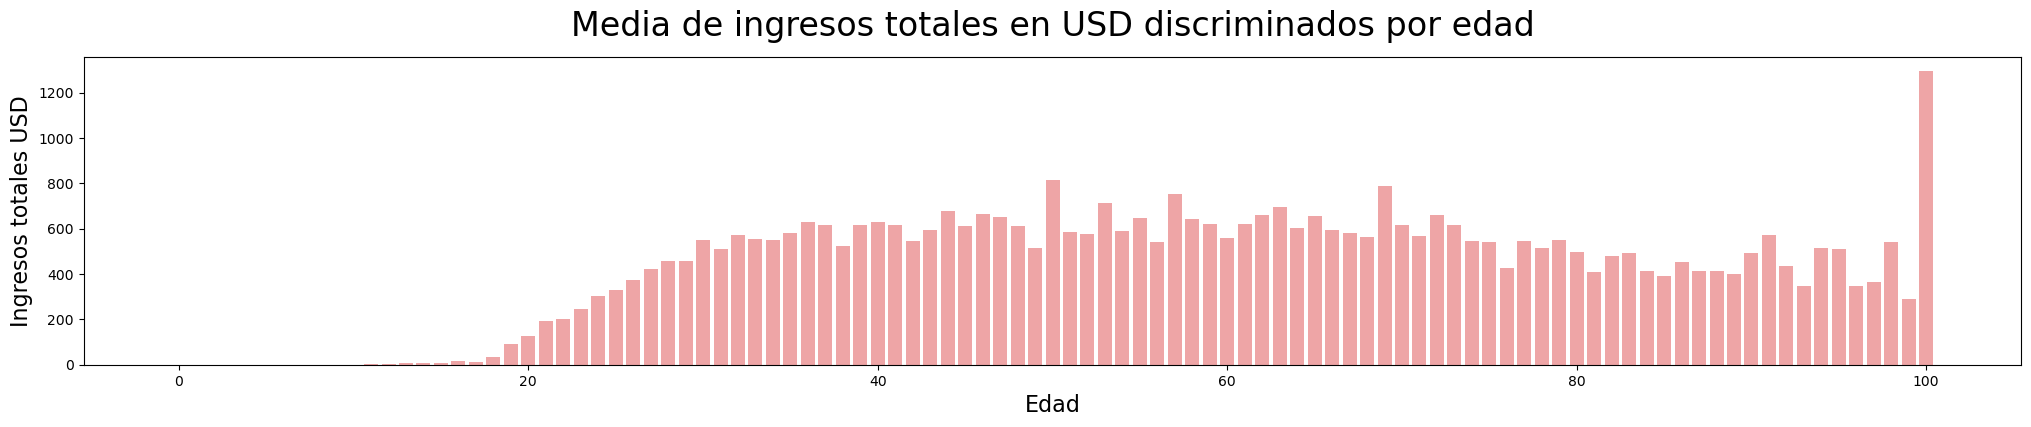

In [139]:
# Calculamos el salario medio por  grupo etario y exploramos 
mediasalario = datos.groupby('edad')['ingresos_totales_USD'].mean() #Calcular el número de nulos por edad
medsalarios = mediasalario.to_frame() #Convertir serie en data frame
medsalarios = medsalarios.reset_index()
medsalarios = medsalarios.rename(columns={'ingresos_totales_USD': 'media_ingresos_totales_USD'})

# Graficamos los salarios medios por grupo etario y vemos que los grupos etarios menores a 18 años poseen salarios igual a cero o
# muy bajos
plt.figure(figsize=(25, 4))
plt.bar("edad", "media_ingresos_totales_USD", data=medsalarios, color="#EEA5A6")
plt.title('Media de ingresos totales en USD discriminados por edad', size=24, pad=15)
plt.ylabel('Ingresos totales USD', size=16)
plt.xlabel('Edad', size=16)

Las variables de ingresos incluyen registros de personas en edad no laboral (menores de edad). Gran parte de los ceros en esas variables derivan, no de registros de gente en desempleo, si no más bien de individuos que no alcanzan la mayoría de edad para tener un trabajo.

Para evitar una subestimación de las medias de las variables de ingresos. Estimamos creamos un data frame con datos para mayores de 18, es decir aquellas personas en edad laboral y estimamos los estadísticos.

In [140]:
datoslab = datos[(datos['edad']>=18)]

## Descripción estadistica de las variables en la población en edad laboral

In [141]:
datoslab.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
count,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.00000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000,11255.000000
mean,2906.752643,1.009151,1.703954,7.690893,46.982408,25528.614127,7611.569347,33140.183474,71373.473478,28847.075167,12.91817,0.800977,402.977334,120.151055,523.128389,1126.653094,455.360303
std,1584.147846,0.130636,0.947417,4.283718,18.973672,37319.125023,17781.984616,39033.730594,62824.383992,29248.456135,3.73407,1.322126,589.094318,280.694311,616.159915,991.702983,461.696229
min,1.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1618.500000,1.000000,1.000000,4.000000,31.000000,0.000000,0.000000,12000.000000,31500.000000,12200.000000,12.00000,0.000000,0.000000,0.000000,189.423836,497.237569,192.580900
50%,2943.000000,1.000000,1.000000,8.000000,44.000000,16000.000000,0.000000,25000.000000,55500.000000,22000.000000,13.00000,0.000000,252.565114,0.000000,394.632991,876.085241,347.277032
75%,4184.000000,1.000000,2.000000,11.000000,62.000000,38000.000000,11000.000000,44000.000000,90000.000000,36250.000000,16.00000,2.000000,599.842147,173.638516,694.554065,1420.678769,572.217837
max,5795.000000,7.000000,15.000000,15.000000,100.000000,1000000.000000,500000.000000,1000000.000000,1000000.000000,1000000.000000,19.00000,15.000000,15785.319653,7892.659826,15785.319653,15785.319653,15785.319653


Del resumen estadístico para los datos de mayores de 18 años podemos destacar: 
*  **edad:** la edad promedio de las personas mayores de edad fue de aproximadamente 47 años. La edad mínima fue de 18 años y la máxima de 100 años. El 50% de las personas se ubicó por debajo de los 44 años de edad.
*  **ingreso_total_lab_USD:** el ingreso en blanco promedio por individuo en edad laboral fue de 402 USD, el 50 % de las personas tuvo un sueldo menor a 253 USD (mediana). El ingreso máximo registrado fue de 9029 USD.
*  **ingreso_total_no_lab_USD:** el ingreso en negro promedio por individuo en edad laboral fue de 120 USD, el 50 % de las personas tuvo sueldos iguales a 0 USD (mediana). El ingreso en negro máximo registrado fue de 7893 USD.
*  **ingresos_totales_USD:** el ingreso total promedio por individuo en edad laboral fue de 522 USD, el 50 % de las personas tuvo sueldos menores a 395 USD (mediana). El ingreso total máximo registrado fue de 9029 USD.
*  **ingresos_familiares_USD:** el ingreso total promedio por familia fue de 1125 USD, el 50 % de los registros tuvo ingresos menores a 876 USD (mediana). El ingreso familiar máximo registrado fue de 11523 USD.
*  **ingreso_per_capita_familiar_USD:** el ingreso total percibido por persona en una familia fue de 454 USD, el 50 % de los registros tuvo ingresos menores a 347 USD (mediana). El ingreso per cápita máximo registrado fue de 7893 USD.

**Para observar la distribución de los datos de cada variable mirar los boxplots abajo**

## Outliers

Analizamos los outliers de la variables de ingreso

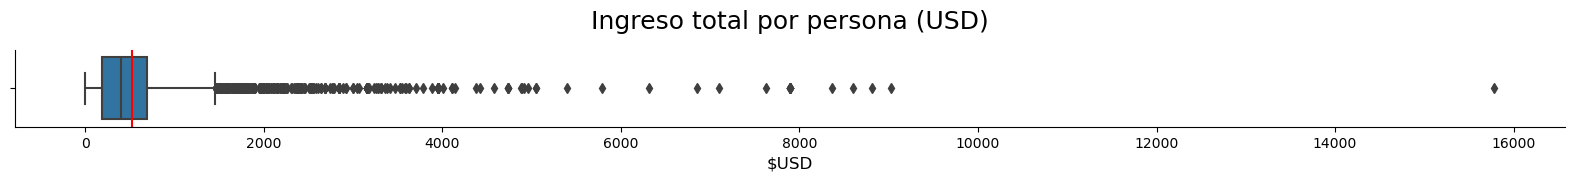

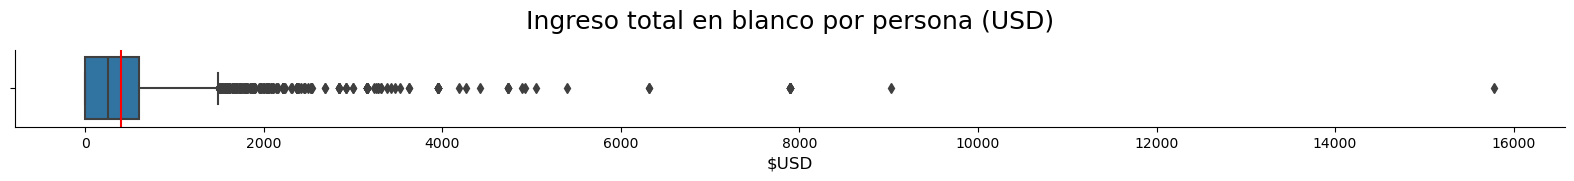

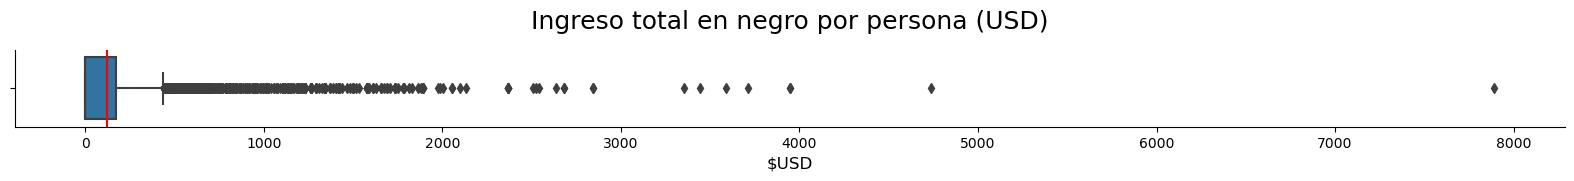

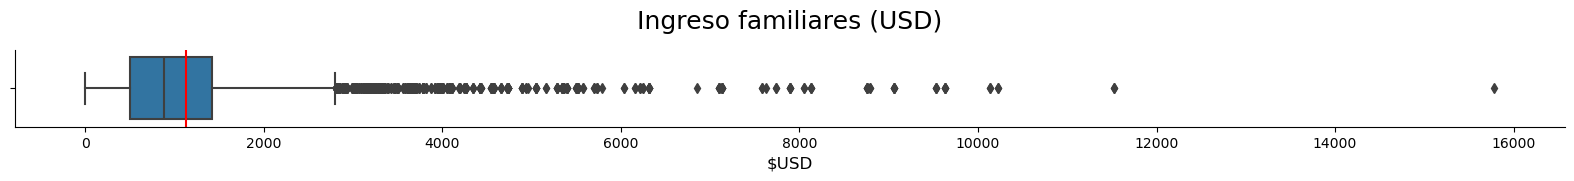

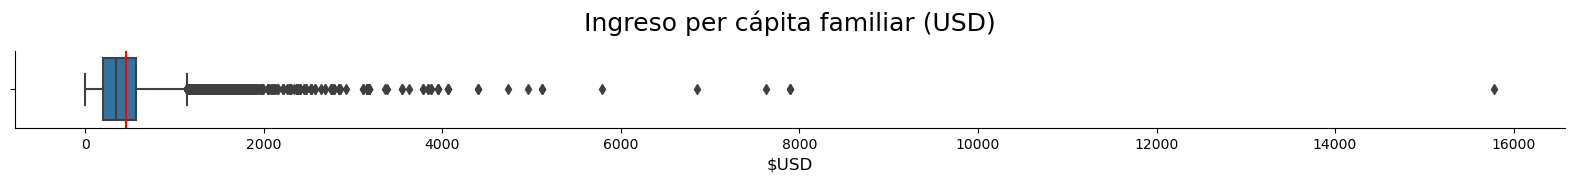

<Figure size 640x480 with 0 Axes>

In [142]:
mediatotales= round(datoslab['ingresos_totales_USD'].mean(),2)
mediatotaleslab= round(datoslab['ingreso_total_lab_USD'].mean(),2)
mediatotalesnolab= round(datoslab['ingreso_total_no_lab_USD'].mean(),2)
mediatotalesfam= round(datoslab['ingresos_familiares_USD'].mean(),2)
mediatotalespercap= round(datoslab['ingreso_per_capita_familiar_USD'].mean(),2)

plt.figure(figsize=(20, 1)) # tamaño de figura

# Subgráfico 1
totales = sns.boxplot(x="ingresos_totales_USD", data=datoslab)
plt.title('Ingreso total por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
totales.axvline(x = mediatotales, color="red")
sns.despine()
plt.show()

plt.figure(figsize=(20, 1)) 
# Subgráfico 2
lab = sns.boxplot(x="ingreso_total_lab_USD", data=datoslab)
plt.title('Ingreso total en blanco por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
lab.axvline(x = mediatotaleslab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1)) 
# Subgráfico 3
nolab=sns.boxplot(x="ingreso_total_no_lab_USD", data=datoslab)
plt.title('Ingreso total en negro por persona (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
nolab.axvline(x = mediatotalesnolab, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1)) 
# Subgráfico 4
fam=sns.boxplot(x="ingresos_familiares_USD", data=datoslab)
plt.title('Ingreso familiares (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
fam.axvline(x = mediatotalesfam, color="red")
sns.despine()
plt.show()


plt.figure(figsize=(20, 1))
# Subgráfico 5
percap=sns.boxplot(x="ingreso_per_capita_familiar_USD", data=datoslab)
plt.title('Ingreso per cápita familiar (USD)', size=18, pad=15)
plt.xlabel('$USD', size=12)
plt.ylabel('', size=12)
percap.axvline(x = mediatotalespercap, color="red")
sns.despine()
plt.show()


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()


Línea roja vertical es la media de cada variable
A partir de los gráficos de caja podemos deducir que todas las variables de ingresos presentan una asimetría marcada hacia la derecha. Es decir que la mayoría de los datos se concentran en valores bajos de ingresos.

En el data set tenemos un valor atípico en las variables de ingreso que corresponde a un hogar compuesto por un sólo miembro (id = 3472). Decidimos eliminarlo. 

In [143]:
#Eliminamos el registro con el valor atípico del data frame original
datos = datos[datos['id'] != 3472]

In [144]:
#Volvemos a filtrar los datos para mayores de edad
datoslab = datos[(datos['edad']>=18)]

### Guardar csv del data frame modificado sin transformacion de variables categoricas

In [145]:
#Guardar CSV nuevo
#datos.to_csv("encuesta-anual-hogares-2019-sintransf.csv", index=False)

### Gráficos

#### Variables demográficas y educativas (Todos los datos)

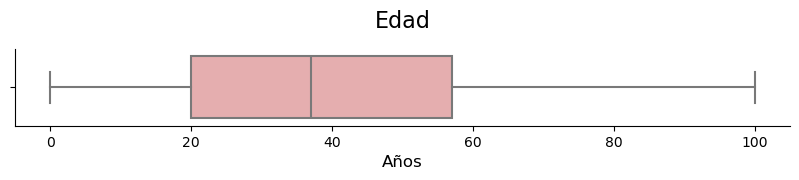

<Figure size 640x480 with 0 Axes>

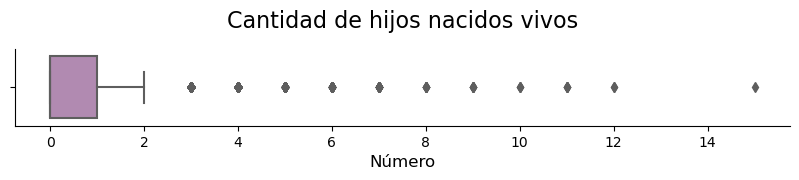

<Figure size 640x480 with 0 Axes>

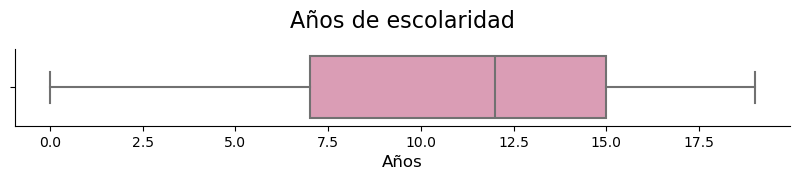

<Figure size 640x480 with 0 Axes>

In [146]:
plt.figure(figsize=(10, 1)) # tamaño de figura

# Subgráfico 1
sns.boxplot(x="edad", data=datos, color="#EEA5A6")
plt.title('Edad', size=16, pad=15)
plt.xlabel('Años', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()
sns.despine()

plt.figure(figsize=(10, 1)) 
# Subgráfico 2
sns.boxplot(x="cantidad_hijos_nac_vivos", data=datos, color="#B784B7")
plt.title('Cantidad de hijos nacidos vivos', size=16, pad=15)
plt.xlabel('Número', size=12)
plt.ylabel('', size=12)
sns.despine()
plt.show()
sns.despine()

plt.figure(figsize=(10, 1)) 
# Subgráfico 3
sns.boxplot(x="años_escolaridad", data=datos,color="#E493B3")
plt.title('Años de escolaridad', size=16, pad=15)
plt.xlabel('Años', size=12)
plt.ylabel('', size=12)
plt
sns.despine()
plt.show()
sns.despine()


plt.tight_layout()  #  ajustar automáticamente el diseño de los subgráficos para evitar solapamientos
plt.show()

#### Ingresos totales por sexo (datos mayores de edad)

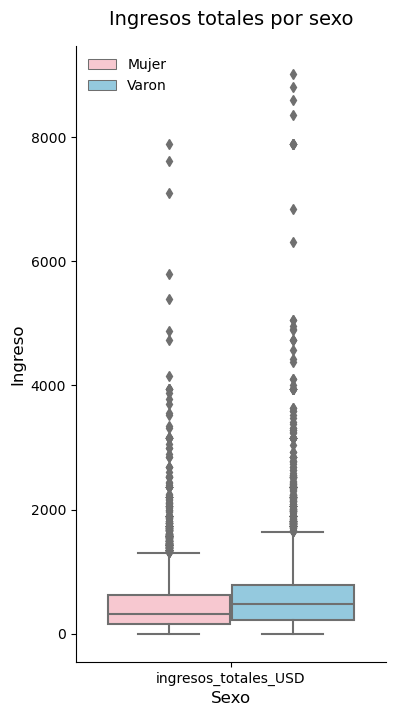

In [147]:
# Ingresos totales por sexo
boxplot_sexo = datoslab.melt(id_vars='sexo', value_vars=['ingresos_totales_USD'])
boxplot_sexo

paleta = {'Varon': 'skyblue', 'Mujer': 'pink'}
plt.figure(figsize=(4, 8))
sns.boxplot(x="variable", y="value", data=boxplot_sexo, palette= paleta, hue='sexo')
plt.title('Ingresos totales por sexo', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Sexo', size=12)
plt.ylabel('Ingreso', size=12)
sns.despine()
plt.show()

A partir del gráfico podemos decir que la mayoría de los varones parecen percibir un sueldo total mayor al de las mujeres. La dispersión de los datos fue similar para ambos grupos, pero los varones tuvieron valores atípicos superiores a los de las mujeres.

## Correlación entre variables

### Variables cuantitativas

In [148]:
datoscuantitativos = datoslab[['años_escolaridad',
    'cantidad_hijos_nac_vivos',
    'ingreso_total_lab_USD',
    'ingreso_total_no_lab_USD',
    'ingresos_totales_USD',
    'ingresos_familiares_USD',
    'ingreso_per_capita_familiar_USD']]

C:\Users\vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

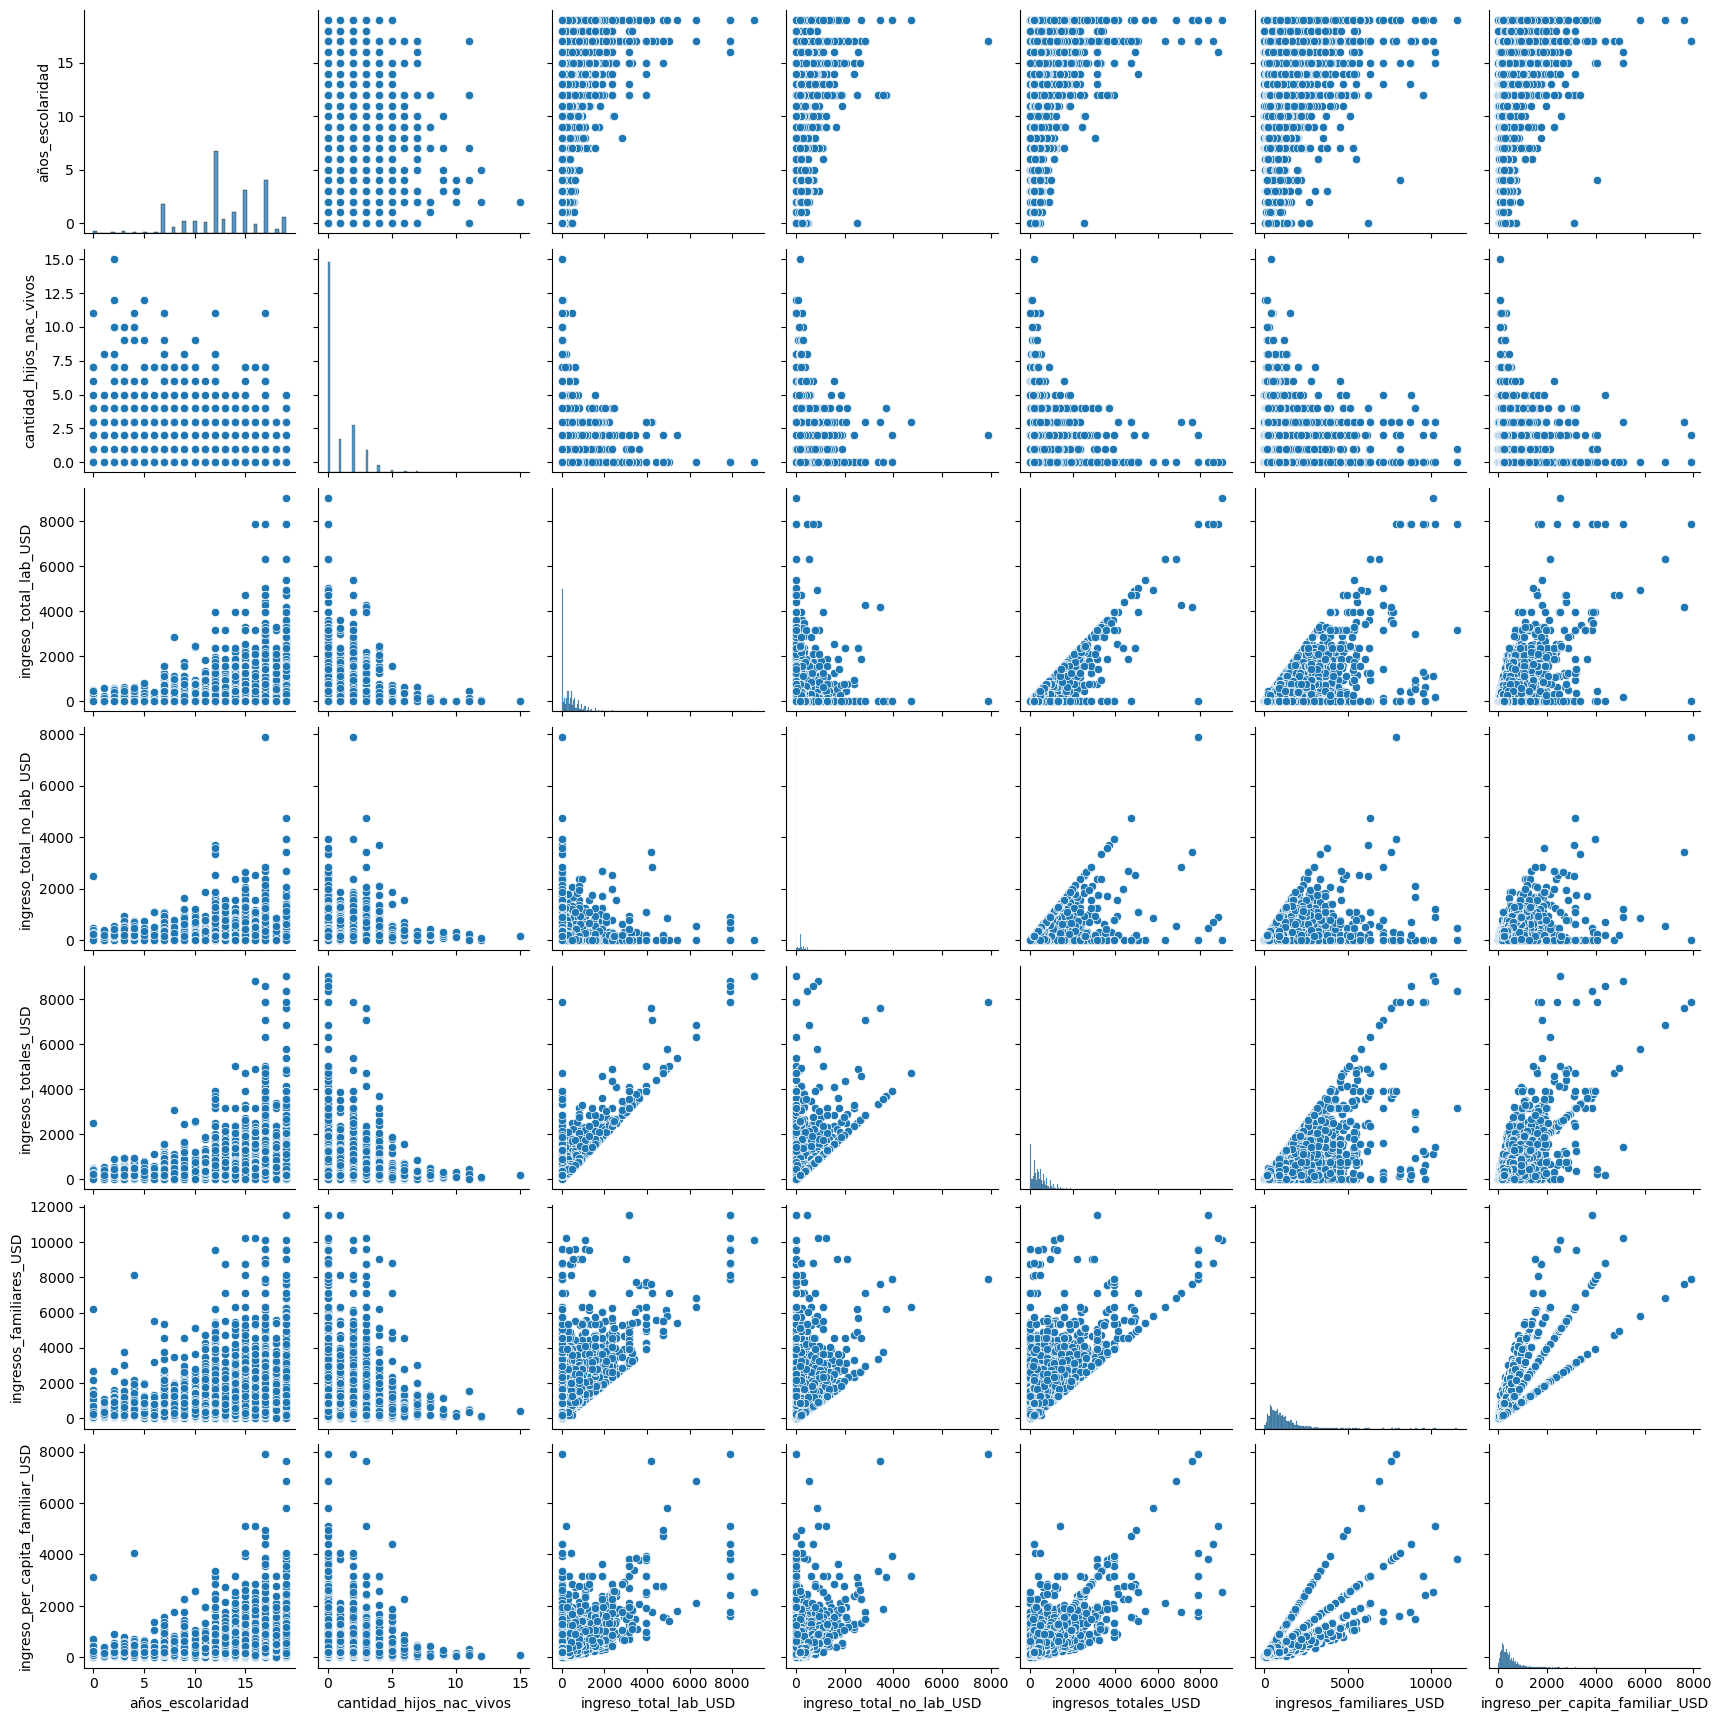

In [149]:
sns.pairplot(datoscuantitativos)
plt.show()

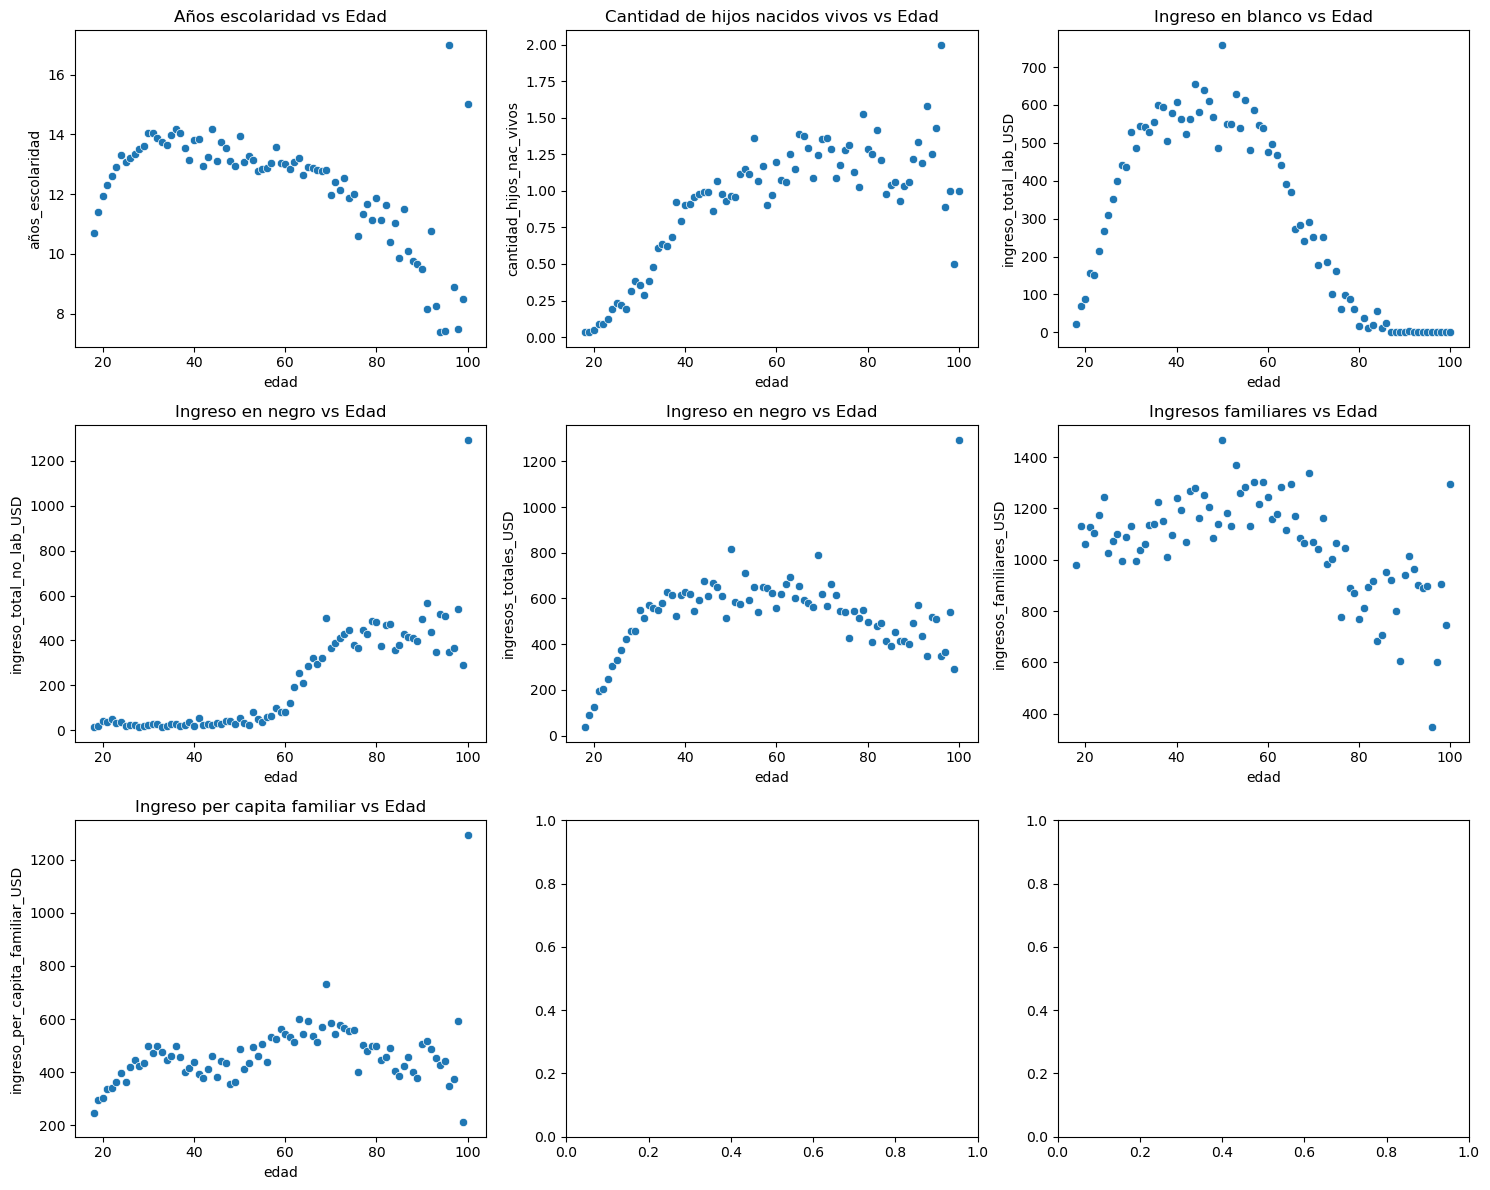

In [150]:
medias = datoslab.groupby("edad").agg({
    'años_escolaridad':'mean',
    'cantidad_hijos_nac_vivos':'mean',
    'ingreso_total_lab_USD':'mean',
    'ingreso_total_no_lab_USD':'mean',
    'ingresos_totales_USD':'mean',
    'ingresos_familiares_USD':'mean',
    'ingreso_per_capita_familiar_USD':'mean'
})

medias = medias.reset_index()
medias

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Graficar cada scatter plot en un subgráfico
sns.scatterplot(data=medias, x='edad', y='años_escolaridad', ax=axs[0, 0])
axs[0, 0].set_title('Años escolaridad vs Edad')

sns.scatterplot(data=medias, x='edad', y='cantidad_hijos_nac_vivos', ax=axs[0, 1])
axs[0, 1].set_title('Cantidad de hijos nacidos vivos vs Edad')

sns.scatterplot(data=medias, x='edad', y='ingreso_total_lab_USD', ax=axs[0, 2])
axs[0, 2].set_title('Ingreso en blanco vs Edad')

sns.scatterplot(data=medias, x='edad', y='ingreso_total_no_lab_USD', ax=axs[1, 0])
axs[1, 0].set_title('Ingreso en negro vs Edad')

sns.scatterplot(data=medias, x='edad', y='ingresos_totales_USD', ax=axs[1, 1])
axs[1, 1].set_title('Ingreso en negro vs Edad')

sns.scatterplot(data=medias, x='edad', y='ingresos_familiares_USD', ax=axs[1, 2])
axs[1, 2].set_title('Ingresos familiares vs Edad')

sns.scatterplot(data=medias, x='edad', y='ingreso_per_capita_familiar_USD', ax=axs[2, 0])
axs[2, 0].set_title('Ingreso per capita familiar vs Edad')
# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

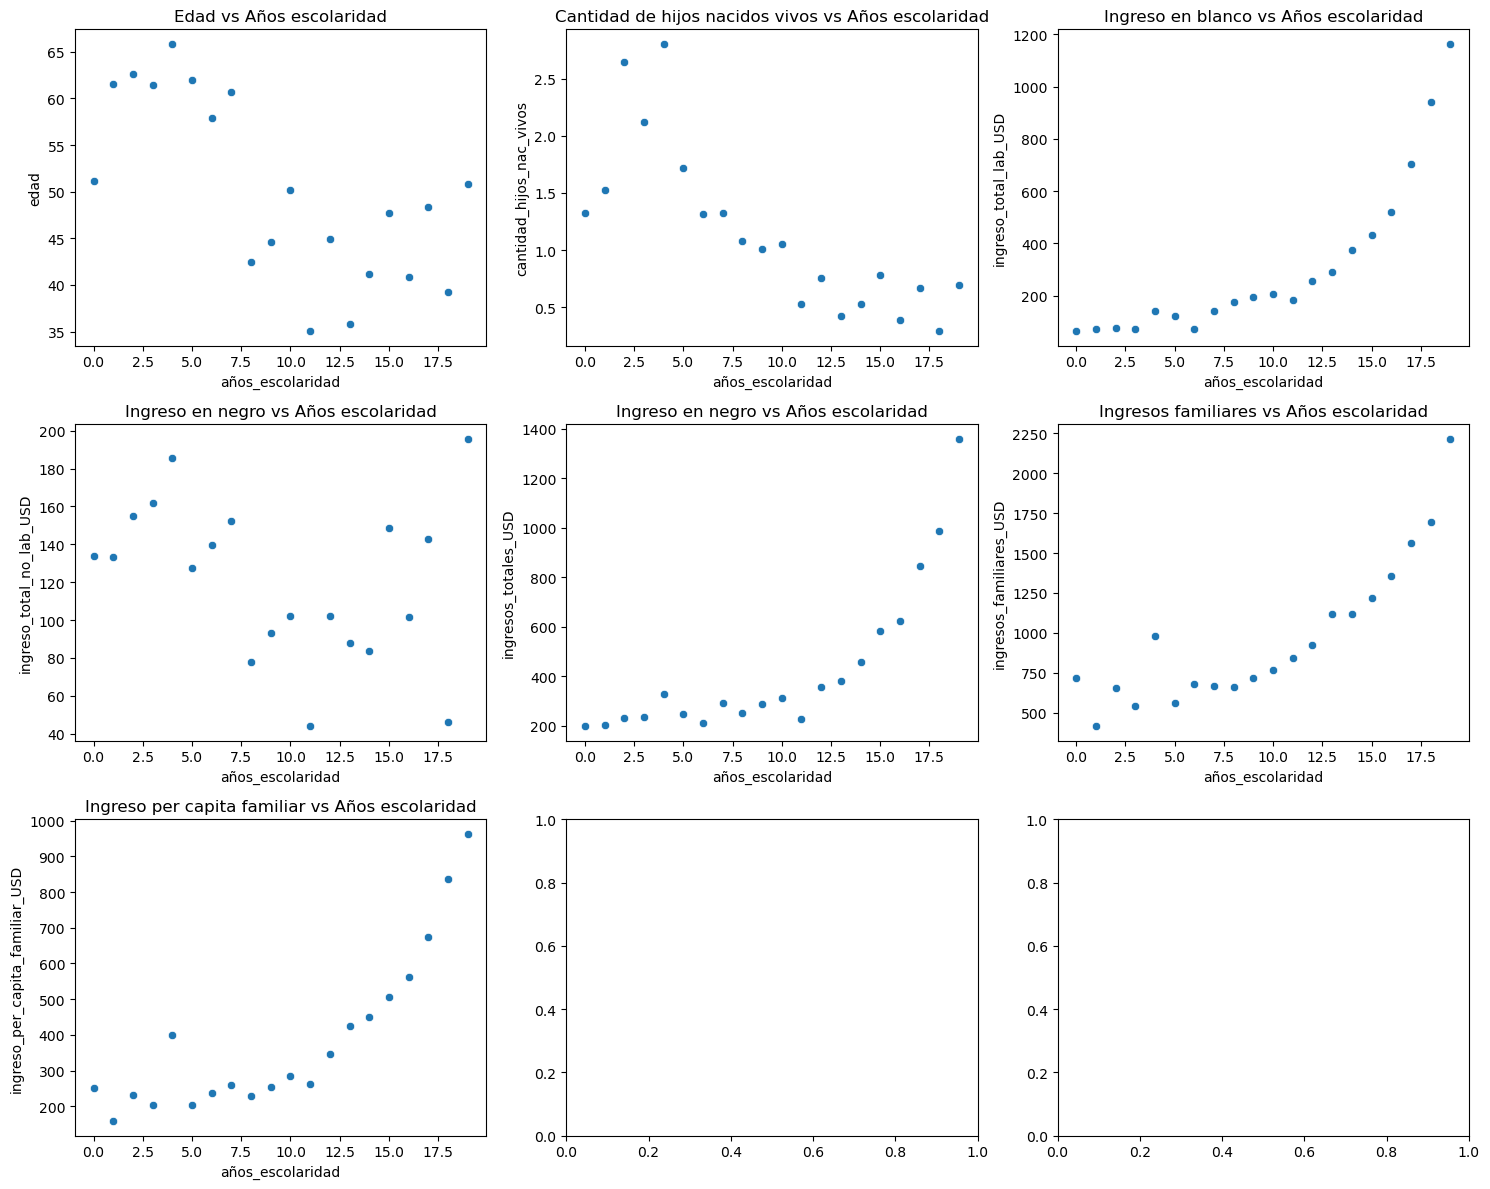

In [151]:
medias1 = datoslab.groupby("años_escolaridad").agg({
    'edad':'mean',
    'cantidad_hijos_nac_vivos':'mean',
    'ingreso_total_lab_USD':'mean',
    'ingreso_total_no_lab_USD':'mean',
    'ingresos_totales_USD':'mean',
    'ingresos_familiares_USD':'mean',
    'ingreso_per_capita_familiar_USD':'mean'
})

medias1 = medias1.reset_index()
medias1

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

nombrex ='años_escolaridad'
# Graficar cada scatter plot en un subgráfico
sns.scatterplot(data=medias1, x=nombrex, y='edad', ax=axs[0, 0])
axs[0, 0].set_title('Edad vs Años escolaridad')

sns.scatterplot(data=medias1, x=nombrex, y='cantidad_hijos_nac_vivos', ax=axs[0, 1])
axs[0, 1].set_title('Cantidad de hijos nacidos vivos vs Años escolaridad')

sns.scatterplot(data=medias1, x=nombrex, y='ingreso_total_lab_USD', ax=axs[0, 2])
axs[0, 2].set_title('Ingreso en blanco vs Años escolaridad')

sns.scatterplot(data=medias1, x=nombrex, y='ingreso_total_no_lab_USD', ax=axs[1, 0])
axs[1, 0].set_title('Ingreso en negro vs Años escolaridad')

sns.scatterplot(data=medias1, x=nombrex, y='ingresos_totales_USD', ax=axs[1, 1])
axs[1, 1].set_title('Ingreso en negro vs Años escolaridad')

sns.scatterplot(data=medias1, x=nombrex, y='ingresos_familiares_USD', ax=axs[1, 2])
axs[1, 2].set_title('Ingresos familiares vs Años escolaridad')

sns.scatterplot(data=medias1, x=nombrex, y='ingreso_per_capita_familiar_USD', ax=axs[2, 0])
axs[2, 0].set_title('Ingreso per capita familiar vs Años escolaridad')
# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

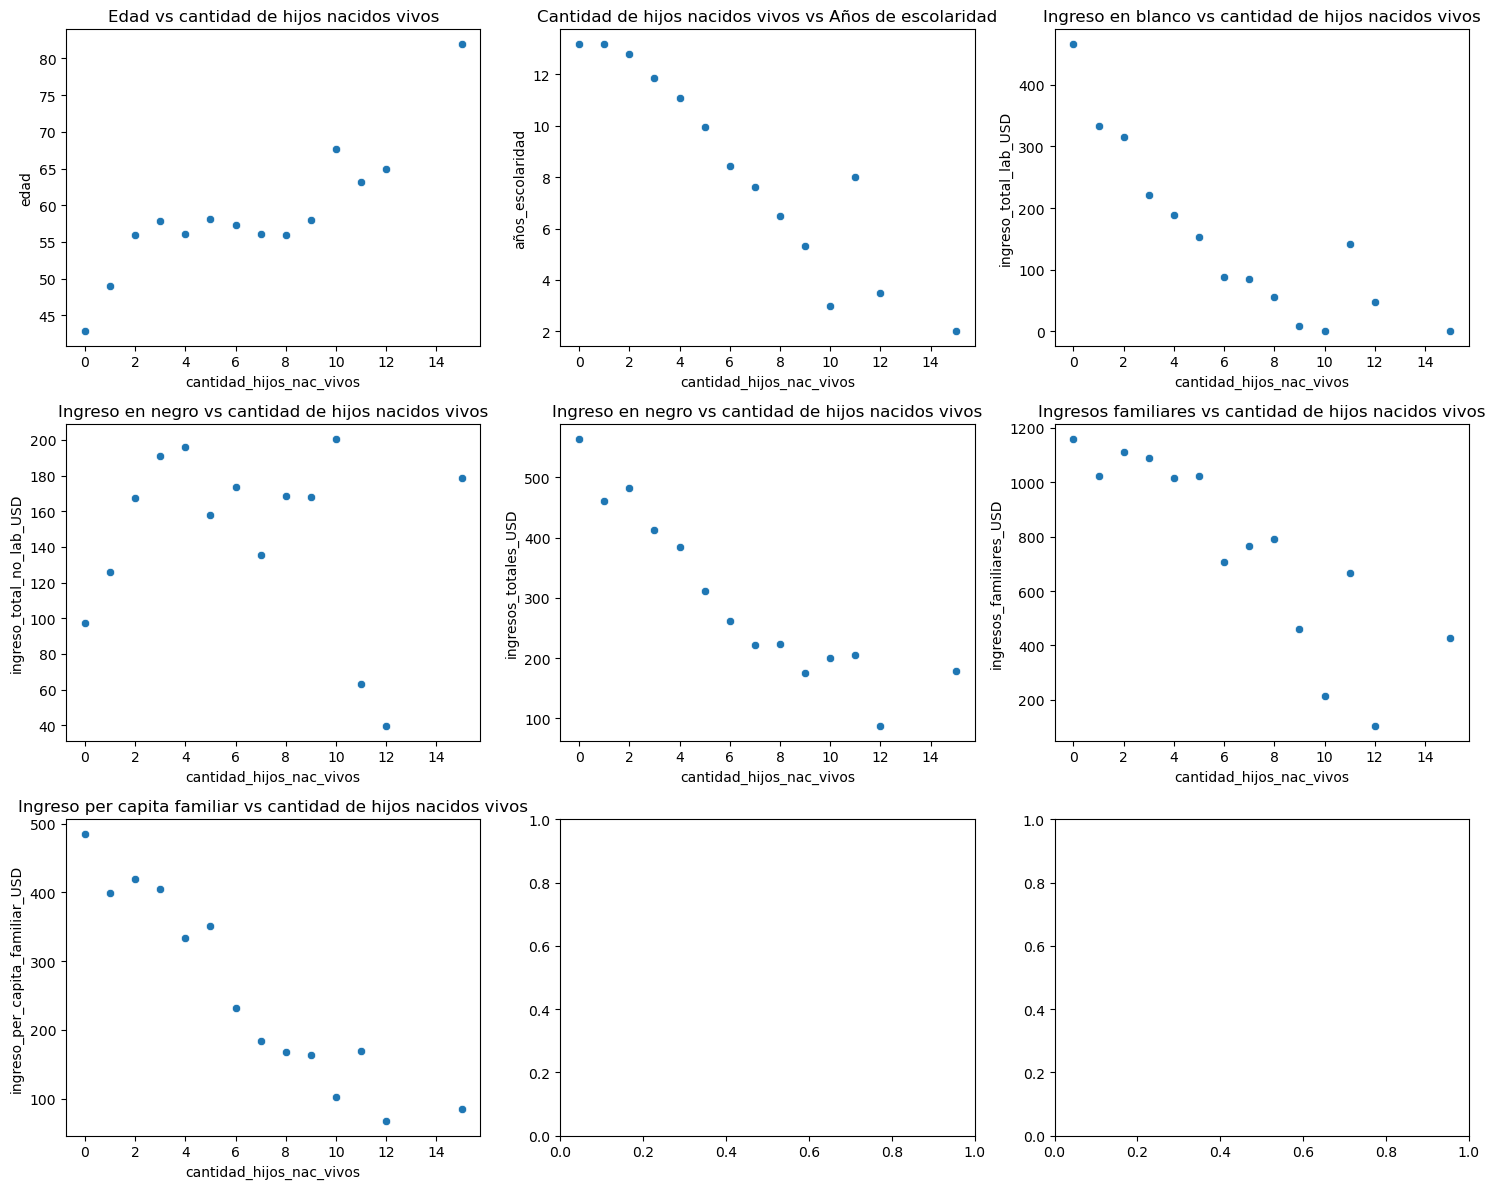

In [152]:
medias2 = datoslab.groupby("cantidad_hijos_nac_vivos").agg({
    'edad':'mean',
    'años_escolaridad':'mean',
    'ingreso_total_lab_USD':'mean',
    'ingreso_total_no_lab_USD':'mean',
    'ingresos_totales_USD':'mean',
    'ingresos_familiares_USD':'mean',
    'ingreso_per_capita_familiar_USD':'mean'
})

medias2 = medias2.reset_index()
medias2

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

me= medias2
nombrex ='cantidad_hijos_nac_vivos'
# Graficar cada scatter plot en un subgráfico
sns.scatterplot(data=me, x=nombrex, y='edad', ax=axs[0, 0])
axs[0, 0].set_title('Edad vs cantidad de hijos nacidos vivos')

sns.scatterplot(data=me, x=nombrex, y='años_escolaridad', ax=axs[0, 1])
axs[0, 1].set_title('Cantidad de hijos nacidos vivos vs Años de escolaridad')

sns.scatterplot(data=me, x=nombrex, y='ingreso_total_lab_USD', ax=axs[0, 2])
axs[0, 2].set_title('Ingreso en blanco vs cantidad de hijos nacidos vivos')

sns.scatterplot(data=me, x=nombrex, y='ingreso_total_no_lab_USD', ax=axs[1, 0])
axs[1, 0].set_title('Ingreso en negro vs cantidad de hijos nacidos vivos')

sns.scatterplot(data=me, x=nombrex, y='ingresos_totales_USD', ax=axs[1, 1])
axs[1, 1].set_title('Ingreso en negro vs cantidad de hijos nacidos vivos')

sns.scatterplot(data=me, x=nombrex, y='ingresos_familiares_USD', ax=axs[1, 2])
axs[1, 2].set_title('Ingresos familiares vs cantidad de hijos nacidos vivos')

sns.scatterplot(data=me, x=nombrex, y='ingreso_per_capita_familiar_USD', ax=axs[2, 0])
axs[2, 0].set_title('Ingreso per capita familiar vs cantidad de hijos nacidos vivos')
# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

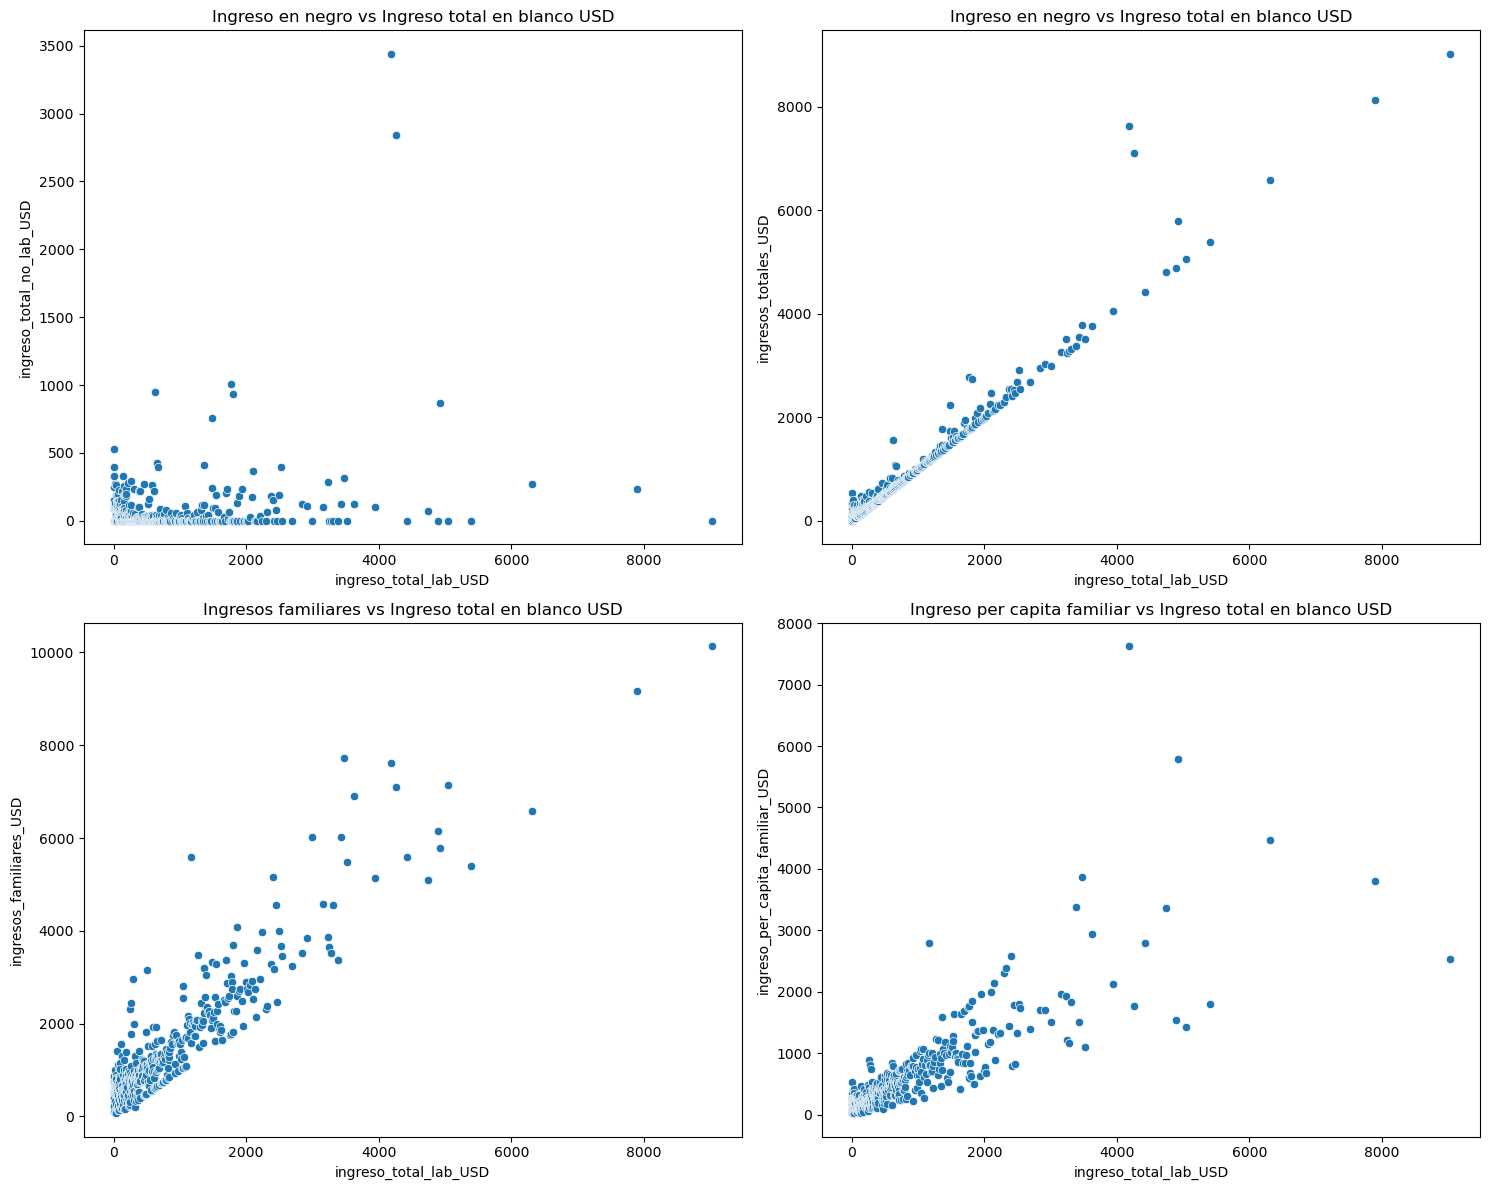

In [153]:
medias3 = datoslab.groupby("ingreso_total_lab_USD").agg({
    'edad':'mean',
    'años_escolaridad':'mean',
    'cantidad_hijos_nac_vivos':'mean',
    'ingreso_total_no_lab_USD':'mean',
    'ingresos_totales_USD':'mean',
    'ingresos_familiares_USD':'mean',
    'ingreso_per_capita_familiar_USD':'mean'
})

medias3 = medias3.reset_index()
medias3

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

me= medias3
nombrex ='ingreso_total_lab_USD'
# Graficar cada scatter plot en un subgráfico

sns.scatterplot(data=me, x=nombrex, y='ingreso_total_no_lab_USD', ax=axs[0, 0])
axs[0, 0].set_title('Ingreso en negro vs Ingreso total en blanco USD')

sns.scatterplot(data=me, x=nombrex, y='ingresos_totales_USD', ax=axs[0, 1])
axs[0,1].set_title('Ingreso en negro vs Ingreso total en blanco USD')

sns.scatterplot(data=me, x=nombrex, y='ingresos_familiares_USD', ax=axs[1, 0])
axs[1,0].set_title('Ingresos familiares vs Ingreso total en blanco USD')

sns.scatterplot(data=me, x=nombrex, y='ingreso_per_capita_familiar_USD', ax=axs[1, 1])
axs[1,1].set_title('Ingreso per capita familiar vs Ingreso total en blanco USD')
# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

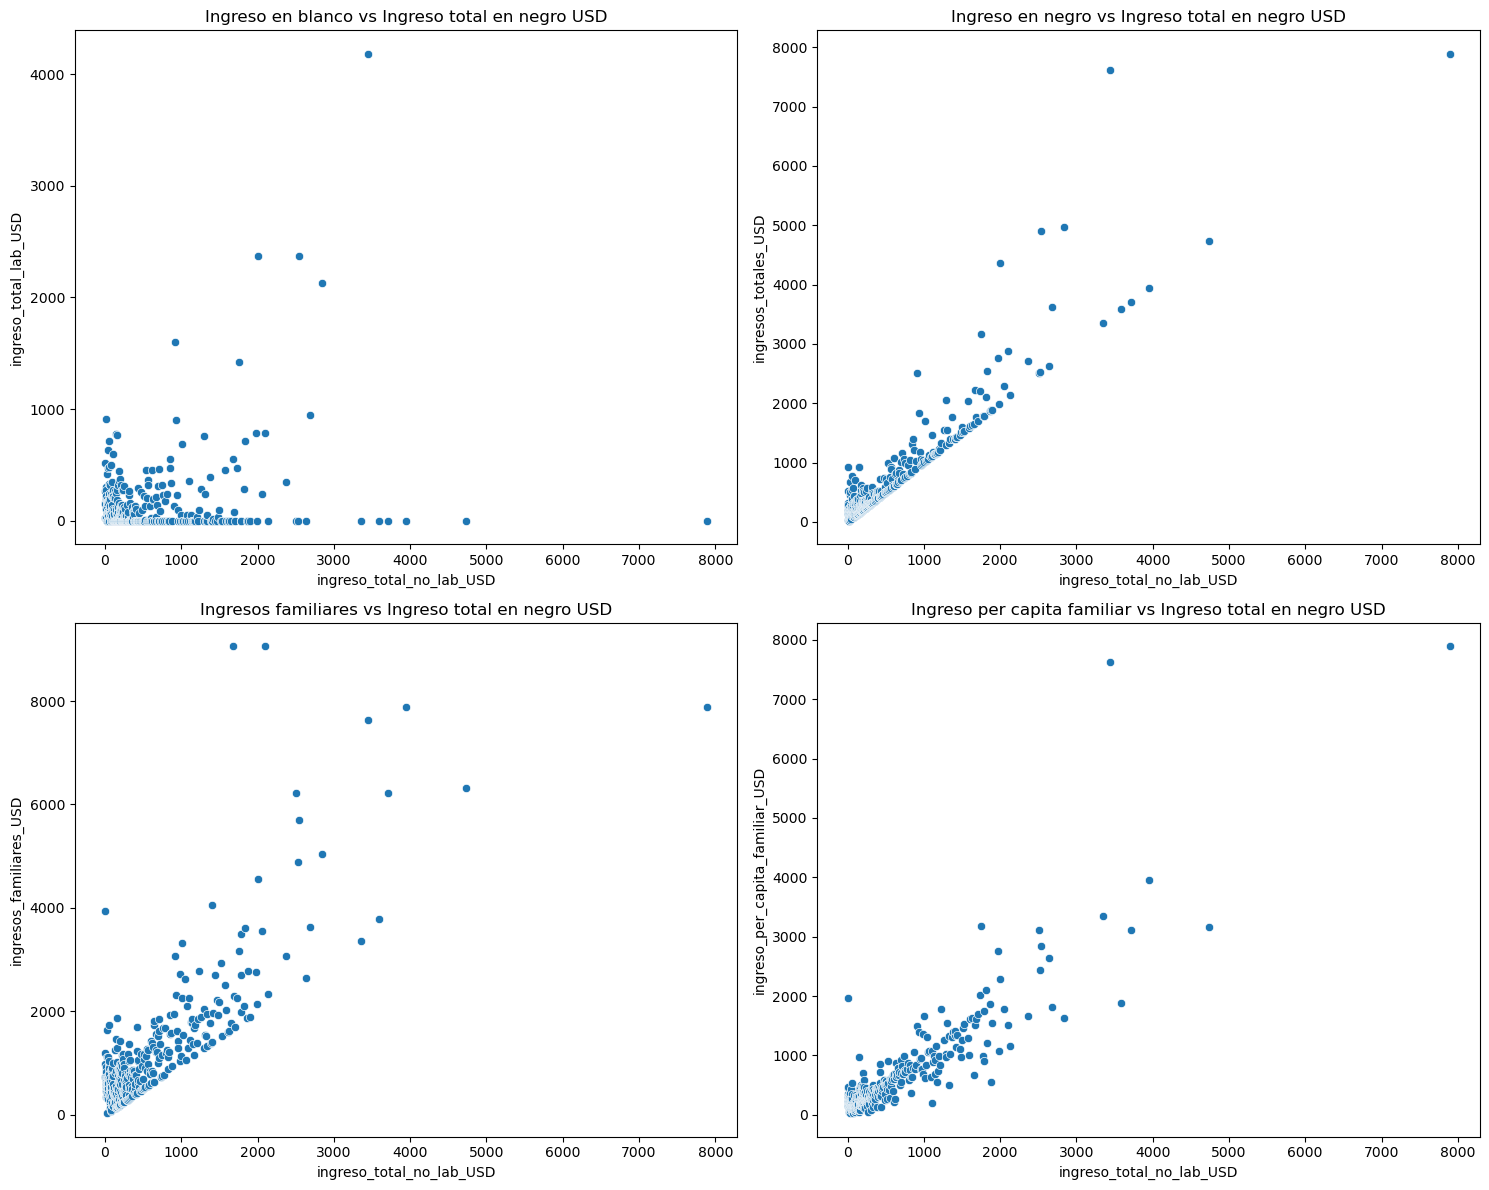

In [154]:
medias4 = datoslab.groupby("ingreso_total_no_lab_USD").agg({
    'edad':'mean',
    'años_escolaridad':'mean',
    'cantidad_hijos_nac_vivos':'mean',
    'ingreso_total_lab_USD':'mean',
    'ingresos_totales_USD':'mean',
    'ingresos_familiares_USD':'mean',
    'ingreso_per_capita_familiar_USD':'mean'
})

medias4 = medias4.reset_index()
medias4

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

me= medias4
nombrex ='ingreso_total_no_lab_USD'
# Graficar cada scatter plot en un subgráfico
sns.scatterplot(data=me, x=nombrex, y='ingreso_total_lab_USD', ax=axs[0, 0])
axs[0, 0].set_title('Ingreso en blanco vs Ingreso total en negro USD')

sns.scatterplot(data=me, x=nombrex, y='ingresos_totales_USD', ax=axs[0, 1])
axs[0, 1].set_title('Ingreso en negro vs Ingreso total en negro USD')

sns.scatterplot(data=me, x=nombrex, y='ingresos_familiares_USD', ax=axs[1, 0])
axs[1, 0].set_title('Ingresos familiares vs Ingreso total en negro USD')

sns.scatterplot(data=me, x=nombrex, y='ingreso_per_capita_familiar_USD', ax=axs[1, 1])
axs[1, 1].set_title('Ingreso per capita familiar vs Ingreso total en negro USD')
# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

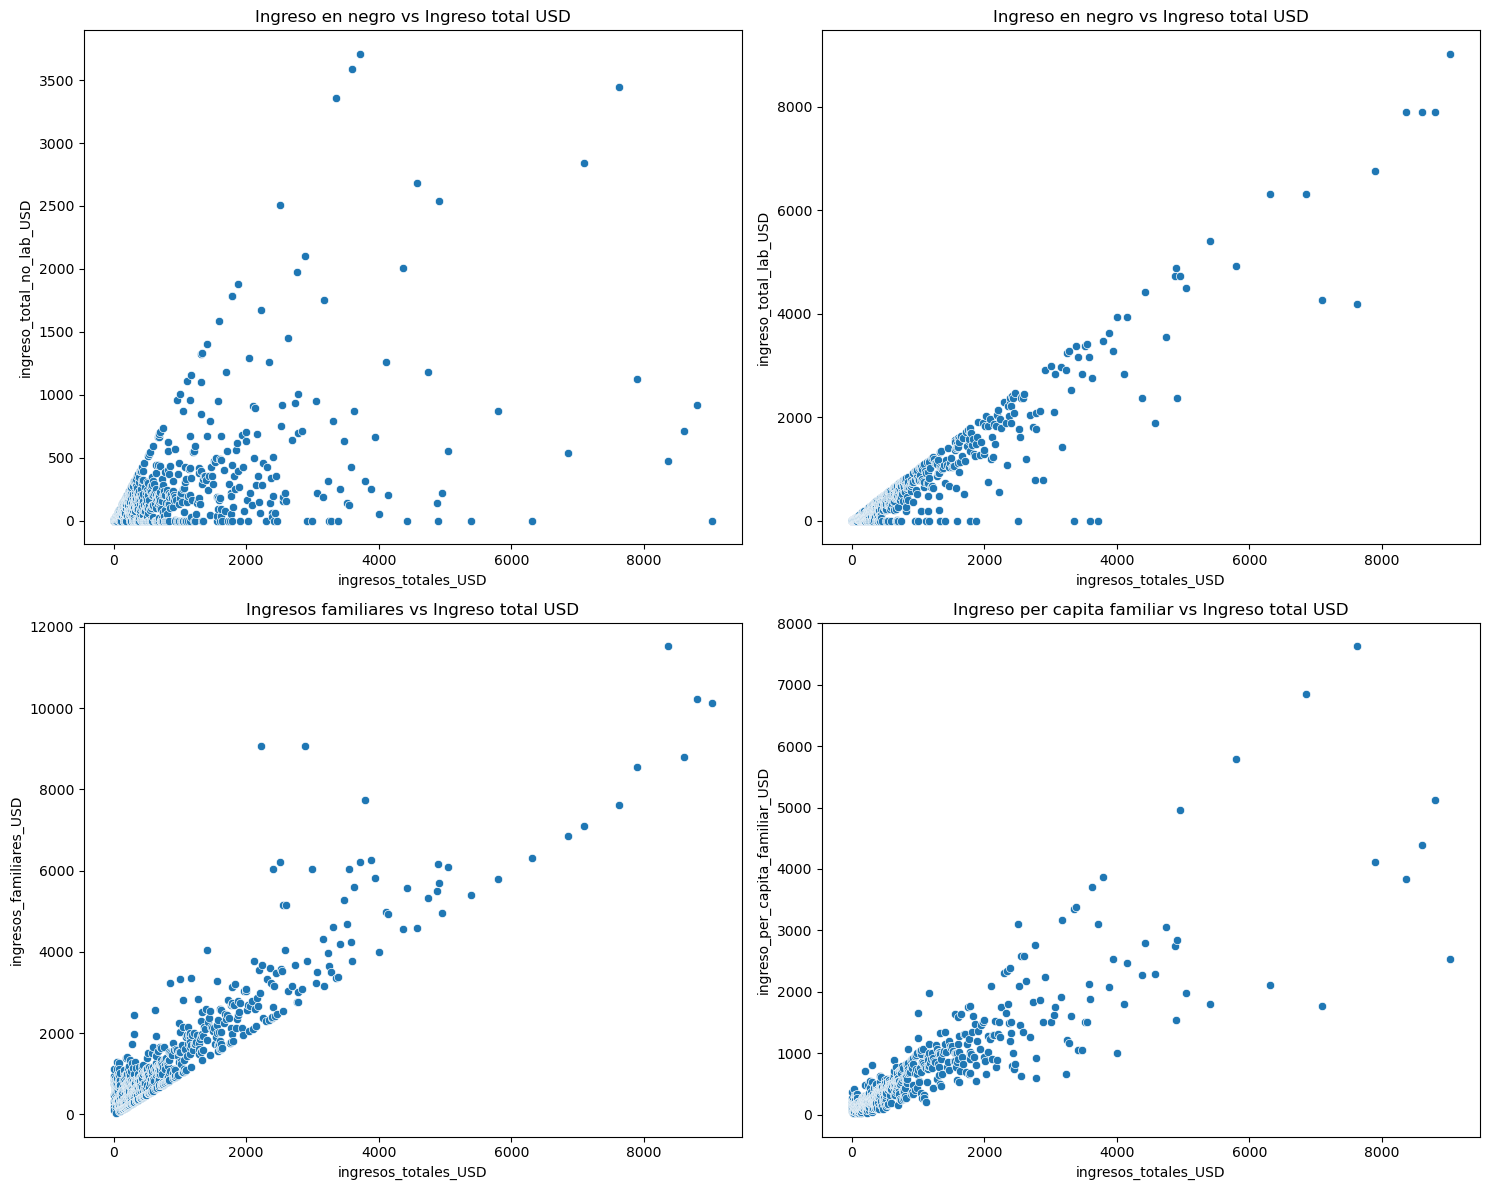

In [155]:
medias5 = datoslab.groupby("ingresos_totales_USD").agg({
    'edad':'mean',
    'años_escolaridad':'mean',
    'cantidad_hijos_nac_vivos':'mean',
    'ingreso_total_no_lab_USD':'mean',
    'ingreso_total_lab_USD':'mean',
    'ingresos_familiares_USD':'mean',
    'ingreso_per_capita_familiar_USD':'mean'
})

medias5 = medias5.reset_index()
medias5

# Crear la figura y los ejes para los subgráficos
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

me= medias5
nombrex ='ingresos_totales_USD'
# Graficar cada scatter plot en un subgráfico

sns.scatterplot(data=me, x=nombrex, y='ingreso_total_no_lab_USD', ax=axs[0, 0])
axs[0, 0].set_title('Ingreso en negro vs Ingreso total USD')

sns.scatterplot(data=me, x=nombrex, y='ingreso_total_lab_USD', ax=axs[0, 1])
axs[0,1].set_title('Ingreso en negro vs Ingreso total USD')

sns.scatterplot(data=me, x=nombrex, y='ingresos_familiares_USD', ax=axs[1, 0])
axs[1,0].set_title('Ingresos familiares vs Ingreso total USD')

sns.scatterplot(data=me, x=nombrex, y='ingreso_per_capita_familiar_USD', ax=axs[1, 1])
axs[1,1].set_title('Ingreso per capita familiar vs Ingreso total USD')
# Ajustar los espacios entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Coeficiente de Pearson 

In [156]:
corr_matrix = datoscuantitativos.corr()
corr_matrix

,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
años_escolaridad,1.000000,-0.182123,0.397362,0.027665,0.391648,0.357668,0.384520
cantidad_hijos_nac_vivos,-0.182123,1.000000,-0.160437,0.106787,-0.102867,-0.051574,-0.101965
ingreso_total_lab_USD,0.397362,-0.160437,1.000000,-0.143012,0.886000,0.588681,0.601431
ingreso_total_no_lab_USD,0.027665,0.106787,-0.143012,1.000000,0.332211,0.160424,0.349847
ingresos_totales_USD,0.391648,-0.102867,0.886000,0.332211,1.000000,0.636172,0.737068
ingresos_familiares_USD,0.357668,-0.051574,0.588681,0.160424,0.636172,1.000000,0.747751
ingreso_per_capita_familiar_USD,0.384520,-0.101965,0.601431,0.349847,0.737068,0.747751,1.000000


### Mapa de calor Coeficiente de Pearson

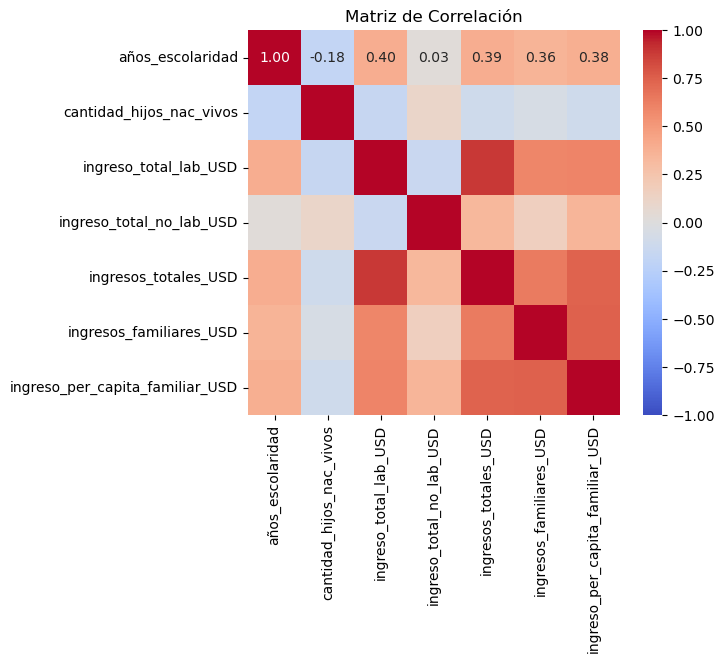

In [157]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Significancia estadística 

In [158]:
# Función para calcular la matriz de valores p
def calculate_p_values(df):
    df = df.dropna()._get_numeric_data()
    p_matrix = pd.DataFrame(np.ones((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            _, p = pearsonr(df.iloc[:, i], df.iloc[:, j])
            p_matrix.iloc[i, j] = p
            p_matrix.iloc[j, i] = p
    return p_matrix

# Calcular la matriz de valores p
p_matrix2 = calculate_p_values(datoscuantitativos)


In [159]:
#significancia estadistica
p_matrix2

,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
años_escolaridad,1.000000e+00,1.577656e-84,0.000000e+00,3.335117e-03,0.000000e+00,0.000000e+00,0.000000e+00
cantidad_hijos_nac_vivos,1.577656e-84,1.000000e+00,8.996269e-66,6.638334e-30,7.381674e-28,4.394062e-08,2.129834e-27
ingreso_total_lab_USD,0.000000e+00,8.996269e-66,1.000000e+00,1.694487e-52,0.000000e+00,0.000000e+00,0.000000e+00
ingreso_total_no_lab_USD,3.335117e-03,6.638334e-30,1.694487e-52,1.000000e+00,4.187872e-288,9.226891e-66,2.183770e-321
ingresos_totales_USD,0.000000e+00,7.381674e-28,0.000000e+00,4.187872e-288,1.000000e+00,0.000000e+00,0.000000e+00
ingresos_familiares_USD,0.000000e+00,4.394062e-08,0.000000e+00,9.226891e-66,0.000000e+00,1.000000e+00,0.000000e+00
ingreso_per_capita_familiar_USD,0.000000e+00,2.129834e-27,0.000000e+00,2.183770e-321,0.000000e+00,0.000000e+00,1.000000e+00


C:\Users\vicky\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


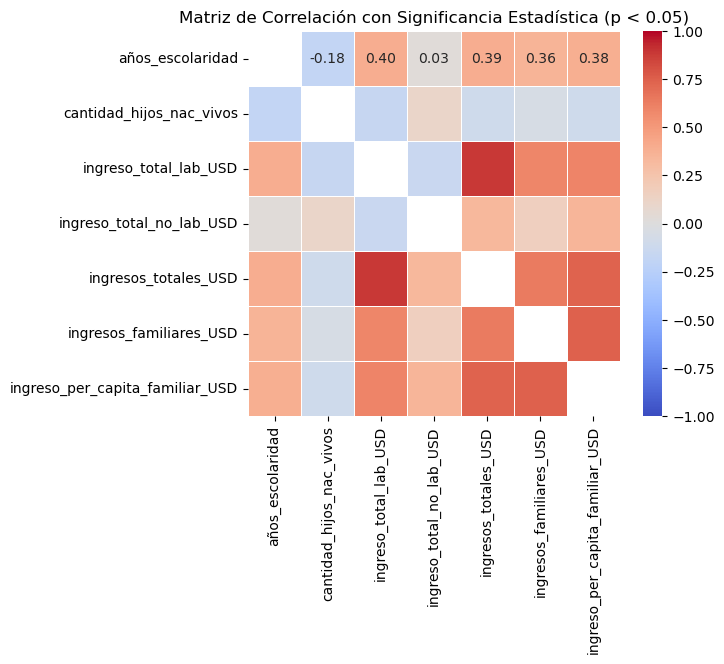

In [160]:
# Crear una máscara para los valores no significativos (p > 0.05)
mask_significant = p_matrix2 < 0.05

# Crear el gráfico de calor (heatmap) con anotaciones
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, fmt=".2f", mask=~mask_significant)
plt.title('Matriz de Correlación con Significancia Estadística (p < 0.05)')
plt.show()

## Coeficiente de Spearman

Muchas de las variables parecen tener relaciones no lineales. Decidimos estimar el coeficiente de Spearman para poder analizar la asociación entre estas variables

In [161]:
# Calcular la matriz de correlación de Spearman
corr_matrixs = datoscuantitativos.corr(method='spearman')
corr_matrixs

,años_escolaridad,cantidad_hijos_nac_vivos,ingreso_total_lab_USD,ingreso_total_no_lab_USD,ingresos_totales_USD,ingresos_familiares_USD,ingreso_per_capita_familiar_USD
años_escolaridad,1.000000,-0.116136,0.429643,-0.119123,0.460044,0.428095,0.496843
cantidad_hijos_nac_vivos,-0.116136,1.000000,-0.212936,0.265406,-0.121239,-0.087874,-0.144365
ingreso_total_lab_USD,0.429643,-0.212936,1.000000,-0.456404,0.775749,0.477643,0.465784
ingreso_total_no_lab_USD,-0.119123,0.265406,-0.456404,1.000000,0.076648,-0.125185,0.077239
ingresos_totales_USD,0.460044,-0.121239,0.775749,0.076648,1.000000,0.532735,0.672395
ingresos_familiares_USD,0.428095,-0.087874,0.477643,-0.125185,0.532735,1.000000,0.749153
ingreso_per_capita_familiar_USD,0.496843,-0.144365,0.465784,0.077239,0.672395,0.749153,1.000000


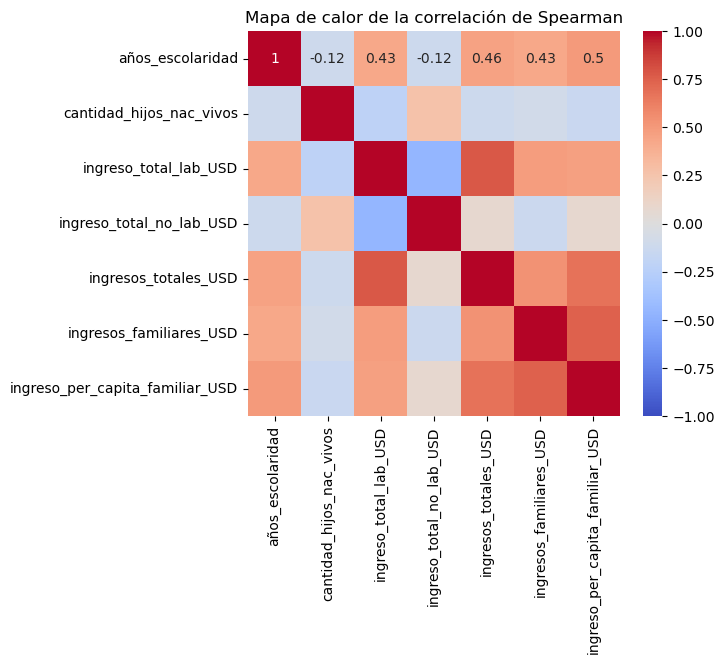

In [162]:
# Crear un mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrixs, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de la correlación de Spearman')
plt.show()

## Matriz V de correlación de Cramer - Asociación entre variables categóricas

In [168]:
datoscategoricos = datoslab[[ 'comuna', 'dominio','sexo',
       'parentesco_jefe', 'situacion_conyugal', 'estado_ocupacional', 'cat_ocupacional',
      'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'sist_de_salud', 'ingresos_totales_USD_cat']]

In [169]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

In [170]:
for i in datoscategoricos.columns :
  data_encoded[i]=label.fit_transform(datoscategoricos[i])

In [171]:
data_encoded

,comuna,dominio,sexo,parentesco_jefe,situacion_conyugal,estado_ocupacional,cat_ocupacional,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,sist_de_salud,ingresos_totales_USD_cat
0,4,0,0,2,3,1,1,0,0,8,1,2,1,0,0,3
1,4,0,0,5,3,1,1,0,0,8,1,1,2,0,0,3
2,1,0,1,2,3,1,1,0,3,8,1,0,2,0,0,4
3,1,0,0,6,5,2,0,1,1,0,5,0,3,1,0,2
4,9,0,0,2,4,1,1,1,1,0,0,0,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,9,0,1,2,0,1,1,1,1,0,4,5,1,0,0,1
11250,9,0,0,4,3,1,1,1,1,0,0,6,1,0,0,3
11251,9,0,0,1,2,1,1,1,1,0,3,0,1,1,0,3
11252,9,0,0,0,0,1,1,1,1,0,2,0,1,1,0,3


In [172]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [173]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
df

,comuna,dominio,sexo,parentesco_jefe,situacion_conyugal,estado_ocupacional,cat_ocupacional,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,sist_de_salud,ingresos_totales_USD_cat
comuna,1.00,0.40,0.03,0.06,0.08,0.07,0.06,0.06,0.06,0.06,0.15,0.15,0.18,0.08,0.27,0.15
dominio,0.40,1.00,0.01,0.09,0.16,0.10,0.09,0.07,0.04,0.14,0.34,0.47,0.42,0.04,0.42,0.29
sexo,0.03,0.01,1.00,0.19,0.20,0.18,0.19,0.01,0.02,0.03,0.07,0.05,0.05,0.67,0.03,0.15
parentesco_jefe,0.06,0.09,0.19,1.00,0.38,0.16,0.10,0.30,0.25,0.17,0.15,0.12,0.11,0.37,0.19,0.22
situacion_conyugal,0.08,0.16,0.20,0.38,1.00,0.26,0.17,0.33,0.27,0.22,0.17,0.10,0.15,0.43,0.24,0.15
estado_ocupacional,0.07,0.10,0.18,0.16,0.26,1.00,0.71,0.07,0.07,0.14,0.19,0.06,0.20,0.19,0.20,0.41
cat_ocupacional,0.06,0.09,0.19,0.10,0.17,0.71,1.00,0.09,0.07,0.10,0.13,0.06,0.19,0.17,0.15,0.30
estado_educativo,0.06,0.07,0.01,0.30,0.33,0.07,0.09,1.00,0.71,0.71,0.69,0.08,0.06,0.23,0.04,0.17
sector_educativo,0.06,0.04,0.02,0.25,0.27,0.07,0.07,0.71,1.00,0.60,0.32,0.06,0.06,0.23,0.05,0.14
nivel_actual,0.06,0.14,0.03,0.17,0.22,0.14,0.10,0.71,0.60,1.00,0.33,0.06,0.08,0.24,0.13,0.17


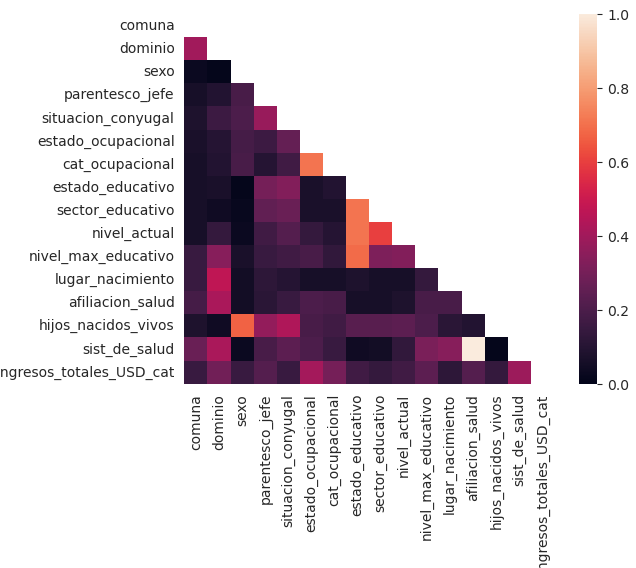

In [174]:
mask = np.zeros_like(df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

## Transformación de variables categóricas

### Variables categoricas binarias

In [175]:
datos = pd.get_dummies(datos, columns=["sexo","hijos_nacidos_vivos", "sist_de_salud"])

In [176]:
datos.replace({True: 1, False: 0}, inplace=True)

### Variables con más de dos categorías

In [177]:
encoder= LabelEncoder()

In [178]:
for column in ['dominio', 'situacion_conyugal', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'calidad_ingresos_no_lab', 'parentesco_jefe',
       'calidad_ingresos_totales',
       'calidad_ingresos_familiares', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'afiliacion_salud', 
       'lugar_nacimiento', 'ingresos_totales_USD_cat']:
    datos[column] = encoder.fit_transform(datos[column])
    print(f'Variable:{column} \nCategorías: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}\n')


Variable:dominio 
Categorías: {'Resto de la Ciudad': 0, 'Villas de emergencia': 1}

Variable:situacion_conyugal 
Categorías: {'Casado/a': 0, 'Divorciado/a': 1, 'No corresponde': 2, 'Separado/a de unión o matrimonio': 3, 'Soltero/a': 4, 'Unido/a': 5, 'Viudo/a': 6}

Variable:estado_ocupacional 
Categorías: {'Desocupado': 0, 'Inactivo': 1, 'Ocupado': 2}

Variable:cat_ocupacional 
Categorías: {'Asalariado': 0, 'No corresponde': 1, 'Patron/empleador': 2, 'Trabajador familiar': 3, 'Trabajador por cuenta propia': 4}

Variable:calidad_ingresos_lab 
Categorías: {'No corresponde': 0, 'No tuvo ingresos': 1, 'Tuvo ingresos pero no declara monto': 2, 'Tuvo ingresos y declara monto': 3}

Variable:calidad_ingresos_no_lab 
Categorías: {'No corresponde': 0, 'No tuvo ingresos': 1, 'Tuvo ingresos pero no declara monto': 2, 'Tuvo ingresos y declara monto': 3}

Variable:parentesco_jefe 
Categorías: {'Conyugue o pareja': 0, 'Hijo/a - Hijastro/a': 1, 'Jefe': 2, 'Nieto/a': 3, 'Otro familiar': 4, 'Otro no fami

### Guardar csv del data frame modificado 

In [180]:
#Guardar CSV nuevo
#datos.to_csv("encuesta-anual-hogares-2019-transf.csv", index=False)